# **Amelia Lusiana**
**Mini Project Predict Customer Personality to Boost Marketing Campaign by Using Machine Learning**

# Part 1 
1. Upload Dataset
2. Melakukan feature engineering: conversion rate
3. Menghitung dan mengelompokkan 'umur' menjadi ke beberapa kelompok
4. Buatlah plot yang dapat menunjukkan hubungan antara conversion rate dan jenis user yang berpotensi lebih besar untuk merespon campaign
5. Interpretasi plot tersebut dan perhatikan, Apakah terdapat hubungan yang signifikan antara umur customer dengan conversion rate

## 1. Upload Dataset

In [1]:
!pip install feature_engine

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import io
from google.colab import files
import plotly.graph_objects as go
import pylab
import scipy.stats as st
import math
import time
import sklearn.cluster as cluster
from scipy.stats import kstest
from datetime import datetime, date
from matplotlib import rcParams
rcParams['figure.figsize'] = (10,7)
rcParams['lines.linewidth'] = 2.5

#data prosesing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.cluster import Birch
from feature_engine import transformation as vt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 290 kB 8.3 MB/s 


In [2]:
#1. upload data
uploaded = files.upload()
df = pd.read_csv(io.BytesIO(uploaded['marketing_campaign_data.csv']))

Saving marketing_campaign_data.csv to marketing_campaign_data.csv


In [3]:
df.shape

(2240, 30)

In [4]:
df.head()

,Unnamed: 0,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,0,5524,1957,S1,Lajang,58138000.0,0,0,04-09-2012,58,...,7,0,0,0,0,0,0,3,11,1
1,1,2174,1954,S1,Lajang,46344000.0,1,1,08-03-2014,38,...,5,0,0,0,0,0,0,3,11,0
2,2,4141,1965,S1,Bertunangan,71613000.0,0,0,21-08-2013,26,...,4,0,0,0,0,0,0,3,11,0
3,3,6182,1984,S1,Bertunangan,26646000.0,1,0,10-02-2014,26,...,6,0,0,0,0,0,0,3,11,0
4,4,5324,1981,S3,Menikah,58293000.0,1,0,19-01-2014,94,...,5,0,0,0,0,0,0,3,11,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           2240 non-null   int64  
 1   ID                   2240 non-null   int64  
 2   Year_Birth           2240 non-null   int64  
 3   Education            2240 non-null   object 
 4   Marital_Status       2240 non-null   object 
 5   Income               2216 non-null   float64
 6   Kidhome              2240 non-null   int64  
 7   Teenhome             2240 non-null   int64  
 8   Dt_Customer          2240 non-null   object 
 9   Recency              2240 non-null   int64  
 10  MntCoke              2240 non-null   int64  
 11  MntFruits            2240 non-null   int64  
 12  MntMeatProducts      2240 non-null   int64  
 13  MntFishProducts      2240 non-null   int64  
 14  MntSweetProducts     2240 non-null   int64  
 15  MntGoldProds         2240 non-null   i

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,2240.0,1.119500e+03,6.467766e+02,0.0,559.75,1119.5,1679.25,2239.0
ID,2240.0,5.592160e+03,3.246662e+03,0.0,2828.25,5458.5,8427.75,11191.0
Year_Birth,2240.0,1.968806e+03,1.198407e+01,1893.0,1959.00,1970.0,1977.00,1996.0
Income,2216.0,5.224725e+07,2.517308e+07,1730000.0,35303000.00,51381500.0,68522000.00,666666000.0
Kidhome,2240.0,4.441964e-01,5.383981e-01,0.0,0.00,0.0,1.00,2.0
Teenhome,2240.0,5.062500e-01,5.445382e-01,0.0,0.00,0.0,1.00,2.0
Recency,2240.0,4.910938e+01,2.896245e+01,0.0,24.00,49.0,74.00,99.0
MntCoke,2240.0,3.039357e+05,3.365974e+05,0.0,23750.00,173500.0,504250.00,1493000.0
MntFruits,2240.0,2.630223e+04,3.977343e+04,0.0,1000.00,8000.0,33000.00,199000.0
MntMeatProducts,2240.0,1.669500e+05,2.257154e+05,0.0,16000.00,67000.0,232000.00,1725000.0


In [7]:
#menghapus kolom Unnamed: 0
df=df.drop(['Unnamed: 0'],axis=1)

In [8]:
#rubah data type kolom Dt_Customer jadi datetime
df['Dt_Customer'] =  pd.to_datetime(df['Dt_Customer'], format='%d-%m-%Y')

In [9]:
#cek null data
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntCoke                 0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [10]:
#isi null data income dengan rata2 
df['Income'].fillna(value = df['Income'].median(), inplace = True)

In [11]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntCoke                0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

In [12]:
#cek data duplicated
df.duplicated().sum()

0

In [13]:
cat = df.select_dtypes(include='object')
catcol = cat.columns
num = df.select_dtypes(include=['int64', 'float64'])
numcol = num.columns

In [14]:
for col in catcol:
    print(f'Value counts kolom \033[1m{col}\033[0m:\n{df[col].value_counts()}\n')

Value counts kolom Education:
S1     1127
S3      486
S2      370
D3      203
SMA      54
Name: Education, dtype: int64

Value counts kolom Marital_Status:
Menikah        864
Bertunangan    580
Lajang         484
Cerai          232
Janda           77
Duda             3
Name: Marital_Status, dtype: int64



In [15]:
for col in numcol:
    print(f'Value counts kolom \033[1m{col}\033[0m:\n{df[col].value_counts()}\n')

Value counts kolom ID:
5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: ID, Length: 2240, dtype: int64

Value counts kolom Year_Birth:
1976    89
1971    87
1975    83
1972    79
1978    77
1970    77
1973    74
1965    74
1969    71
1974    69
1956    55
1958    53
1979    53
1952    52
1977    52
1968    51
1959    51
1966    50
1954    50
1955    49
1960    49
1982    45
1963    45
1967    44
1962    44
1957    43
1951    43
1983    42
1986    42
1964    42
1980    39
1981    39
1984    38
1961    36
1953    35
1985    32
1989    30
1949    30
1950    29
1988    29
1987    27
1948    21
1990    18
1946    16
1947    16
1991    15
1992    13
1945     8
1943     7
1944     7
1993     5
1995     5
1994     3
1996     2
1899     1
1941     1
1893     1
1900     1
1940     1
Name: Year_Birth, dtype: int64

Value counts kolom Income:
51381500.0    24
7500000.0     12
35860000.0     4
37760000.0     3
83844000.0     3
     

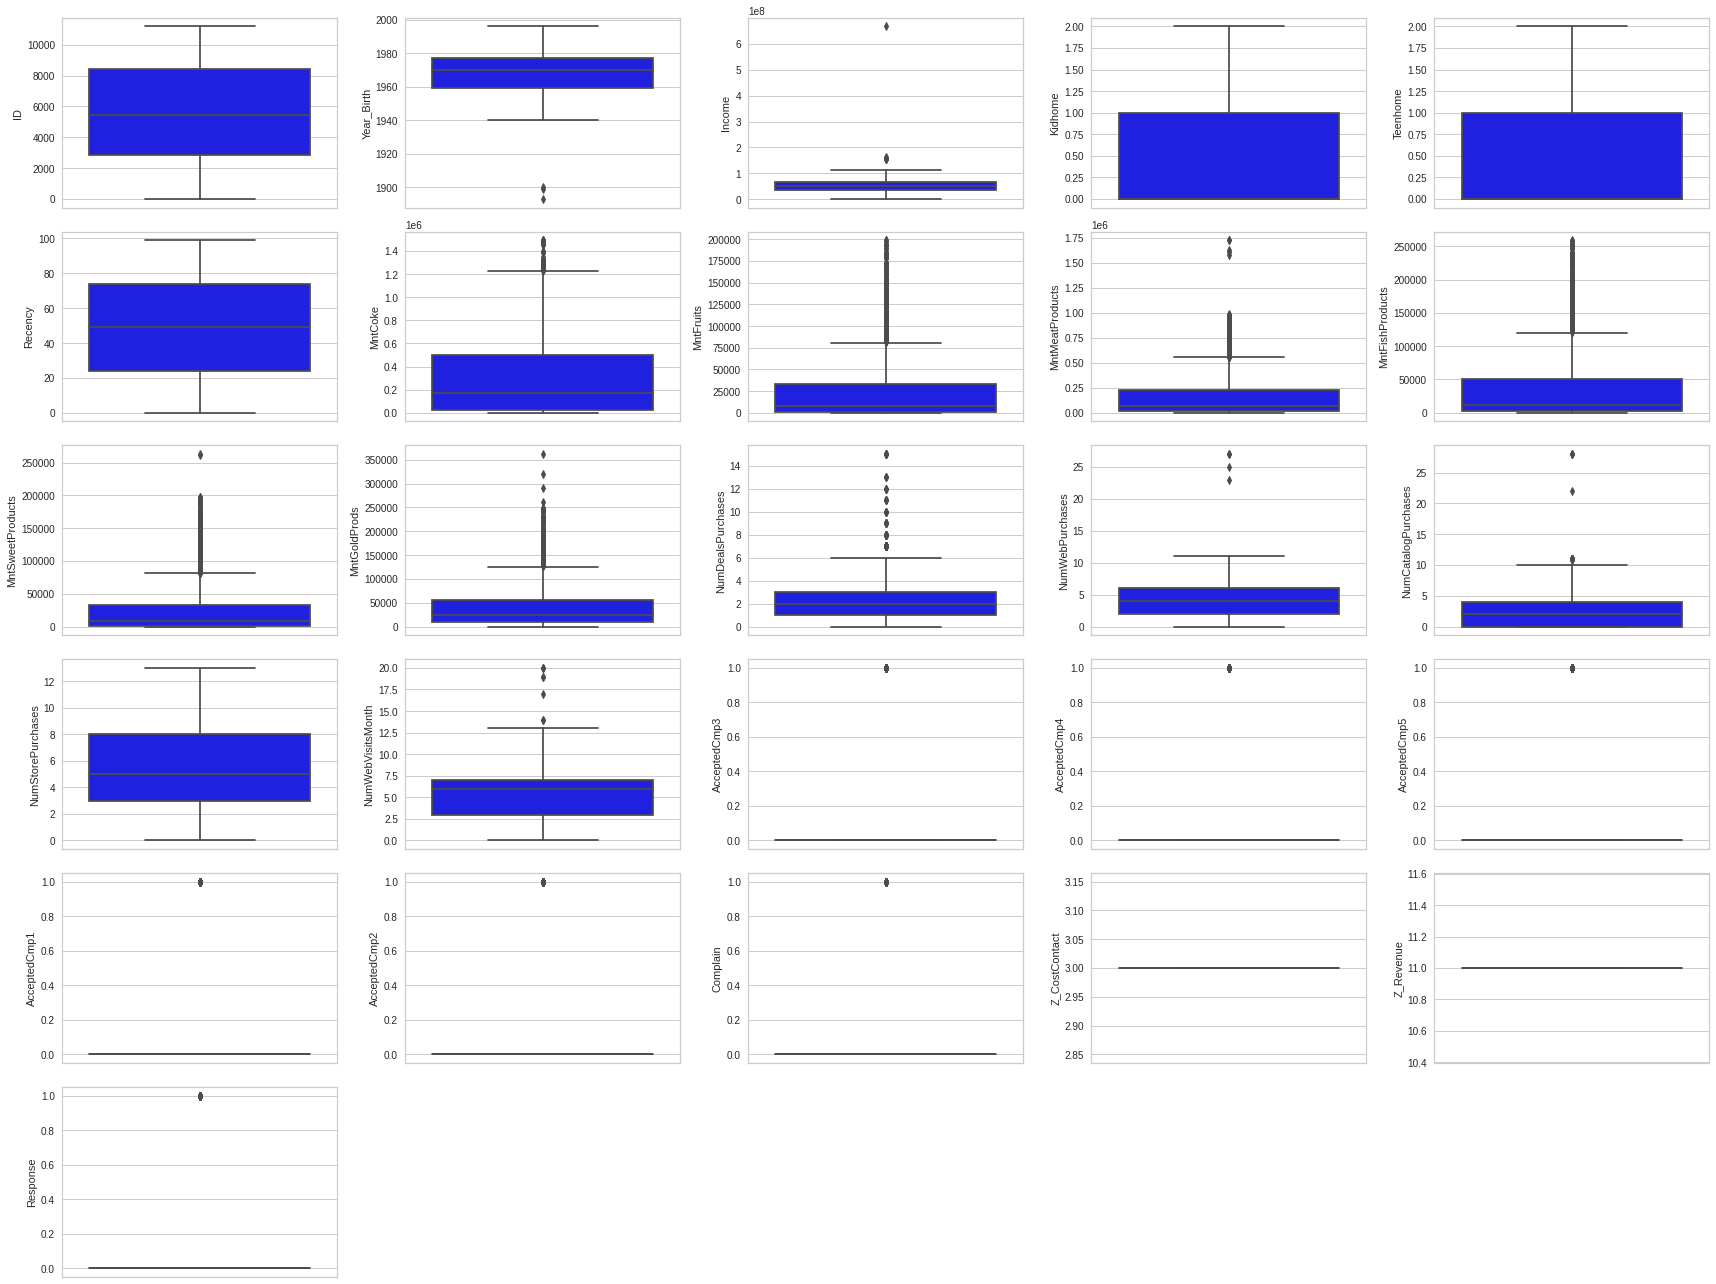

In [16]:
plt.figure(figsize=(24,18))
for i in range(0, len(numcol)):
    plt.subplot(6, 5, i+1)
    sns.boxplot(y=df[numcol[i]], color='blue', orient='n')
    plt.tight_layout()

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:316: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  warnings.warn(msg, UserWarning)


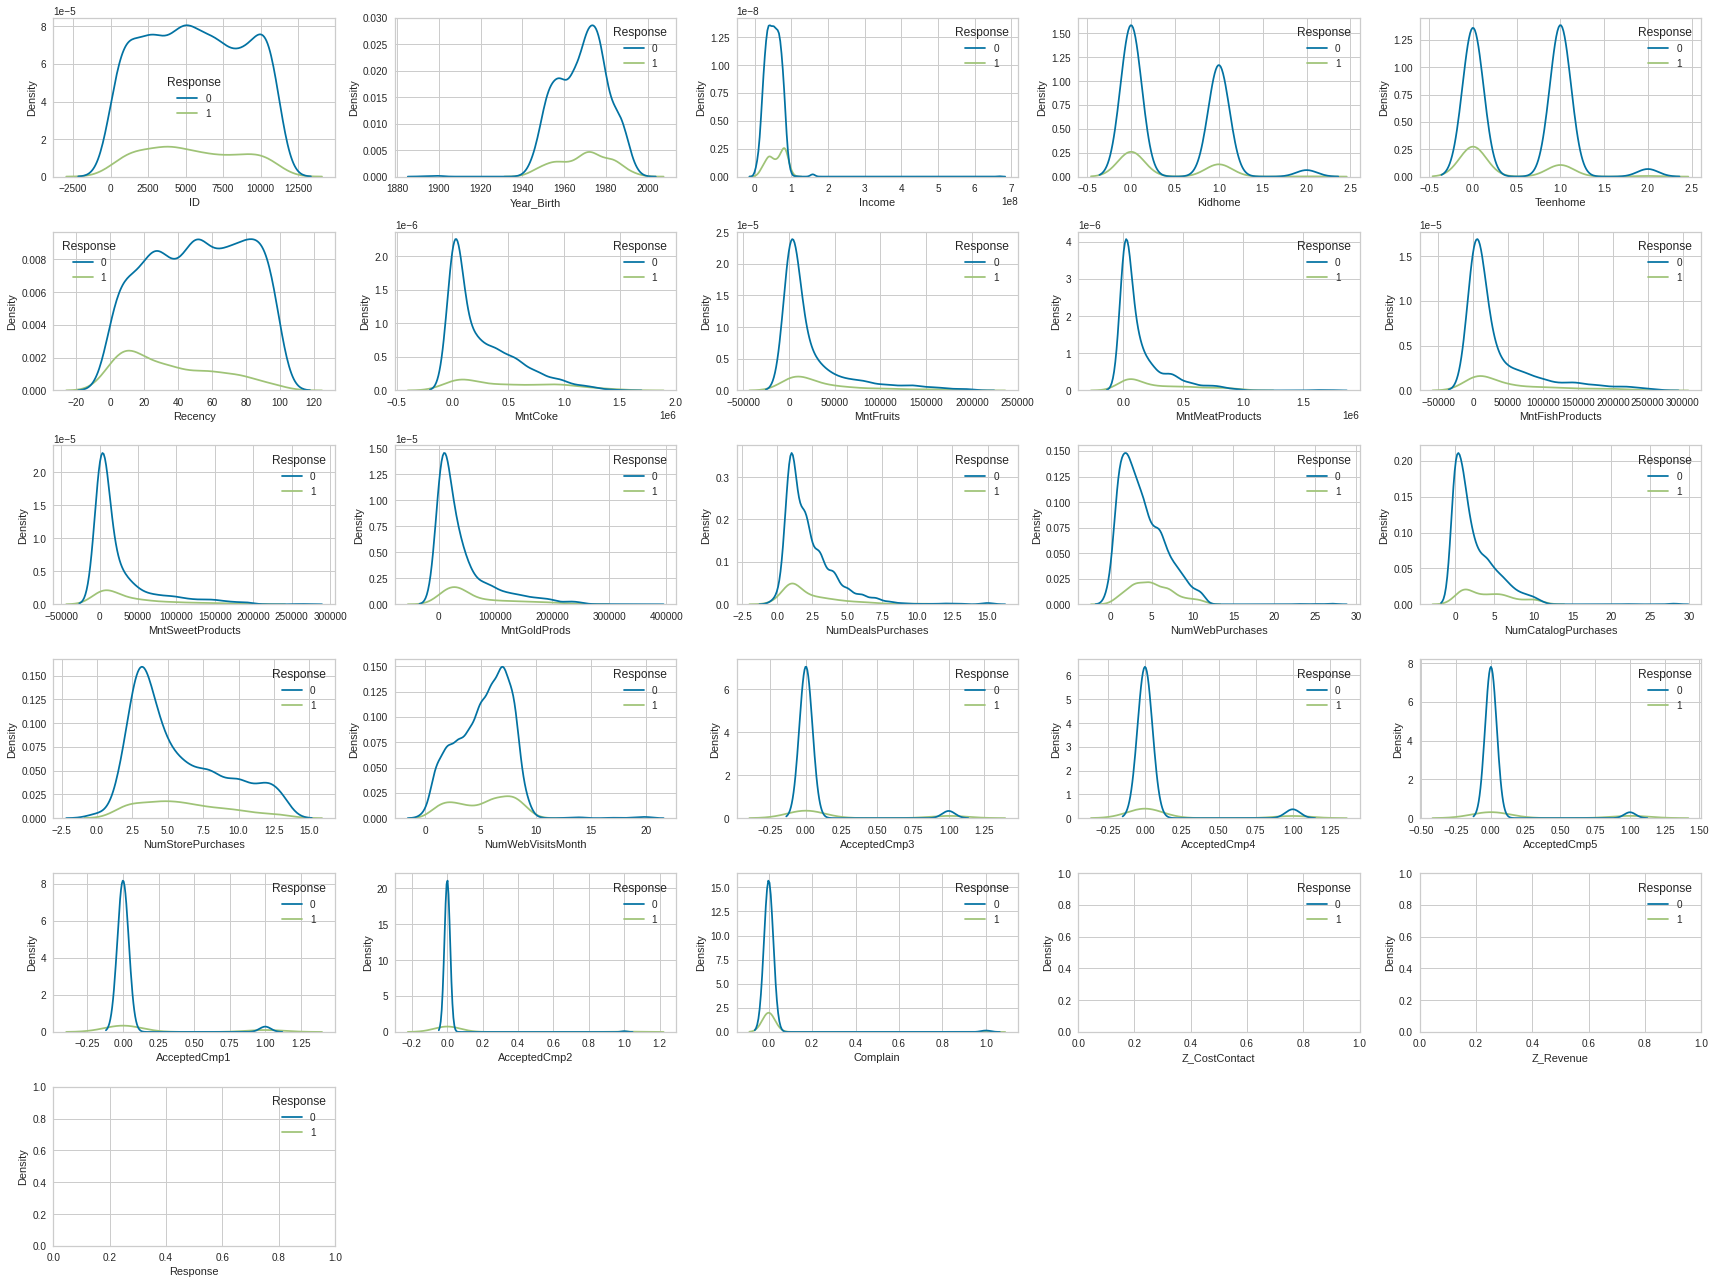

In [17]:
plt.figure(figsize=(24,18))
for i in range(0, len(numcol)):
    plt.subplot(6, 5, i+1)
    sns.kdeplot(x=df[numcol[i]], color='red', hue=df['Response'])
    plt.tight_layout()

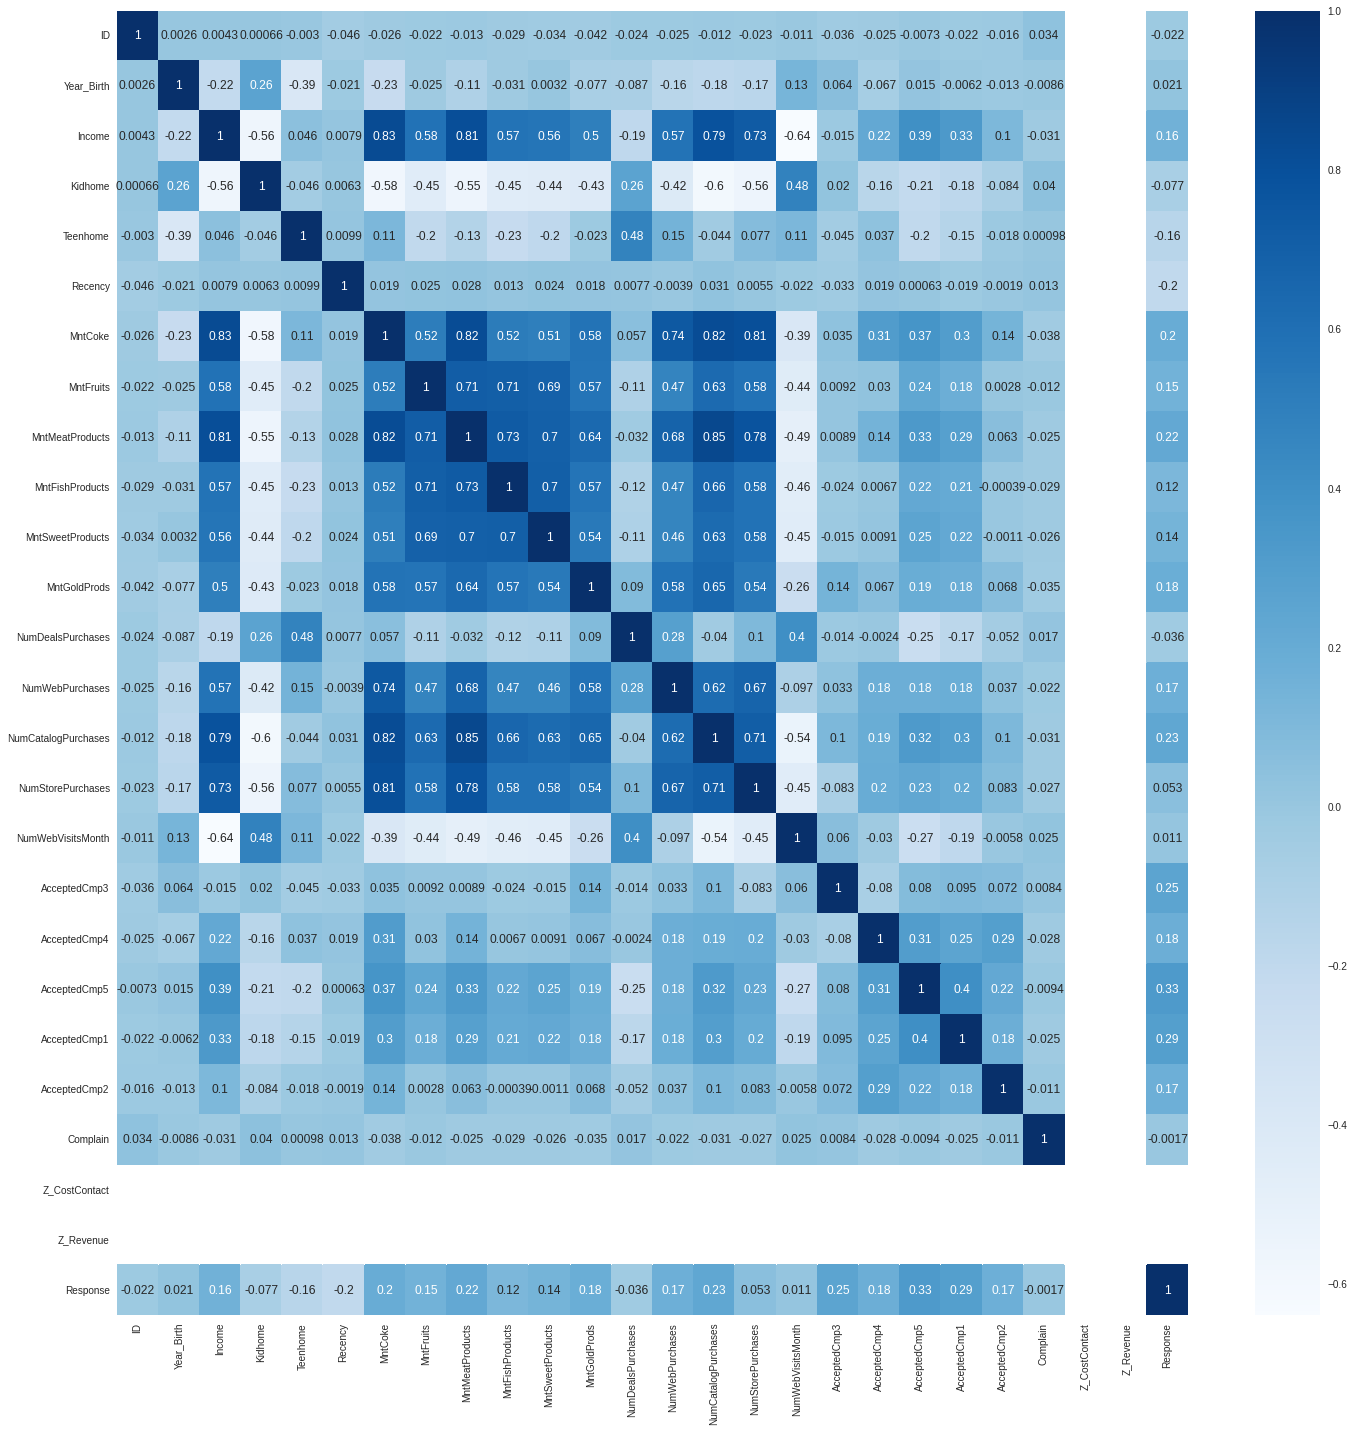

In [18]:
plt.figure(figsize=(24, 24))
sns.heatmap(df.corr(method='spearman'), cmap='Blues', annot=True)
plt.show()

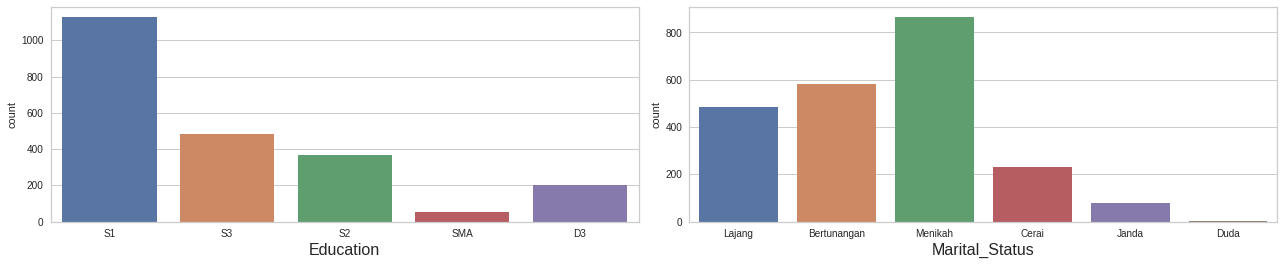

In [19]:
plt.figure(figsize = (18,7))
for i in range(0, len(catcol)):
    plt.subplot(2, 2, i+1)
    sns.countplot(x=df[catcol[i]], palette='deep', orient='h')
    plt.tight_layout()
    plt.xlabel(xlabel=catcol[i],fontsize=16)

##2. Melakukan feature engineering

In [21]:
df1 = df.copy()

### Total Purchase

In [22]:
df1['total_purchase'] = df1['NumDealsPurchases'] + df1['NumWebPurchases'] + df1['NumCatalogPurchases'] + df1['NumStorePurchases']

In [23]:
df1['total_purchase'].describe()

count    2240.000000
mean       14.862054
std         7.677173
min         0.000000
25%         8.000000
50%        15.000000
75%        21.000000
max        44.000000
Name: total_purchase, dtype: float64

### Conversion Rate

In [24]:
def cvr(x,y):
  if y == 0:
    return 0
  return x/y

df1['conversion_rate'] = df1.apply(lambda x : cvr(x['total_purchase'], x['NumWebVisitsMonth']), axis =1) 

In [25]:
df1['conversion_rate'].describe()

count    2240.000000
mean        4.395222
std         4.913624
min         0.000000
25%         1.222222
50%         2.600000
75%         5.350000
max        43.000000
Name: conversion_rate, dtype: float64

### Total Children

In [26]:
df1['total_children'] = df1['Kidhome'] + df1['Teenhome']

In [27]:
df1['total_children'].value_counts()

1    1128
0     638
2     421
3      53
Name: total_children, dtype: int64

###Family Size

In [28]:
df1['Relationship'] = df1['Marital_Status'].replace({"Menikah":"yes", "Bertunangan":"yes", "Lajang":"no",
    "Cerai":"no", "Janda":"no", "Duda":"no"})

step_2 = df1['Relationship'].replace({'no': 1, 'yes': 2})

df1['Family_Size'] = step_2 + df1['total_children'] # Total number of people in the family

In [29]:
df1['Family_Size'].value_counts()

3    889
2    764
4    301
1    254
5     32
Name: Family_Size, dtype: int64

### Age

In [30]:
df1['Age'] = datetime.now().year - df1['Year_Birth']

In [31]:
df1['Age'].describe()

count    2240.000000
mean       53.194196
std        11.984069
min        26.000000
25%        45.000000
50%        52.000000
75%        63.000000
max       129.000000
Name: Age, dtype: float64

###Since Registration

In [32]:
def get_different_year():
    registration_year = pd.to_datetime(df1['Dt_Customer'], format='%d-%m-%Y').apply(lambda x: x.year)
    current_year = datetime.now().year
    return current_year - registration_year

df1['since_registration'] = get_different_year()  # seberapa lama customer berlangganan

In [33]:
df1['since_registration'].value_counts()

9     1189
8      557
10     494
Name: since_registration, dtype: int64

###Total Spent on Product

In [34]:
df1['total_amounts'] = df1['MntCoke'] + df1['MntFruits'] + df1['MntMeatProducts'] + df1['MntFishProducts'] + df1['MntSweetProducts'] + df1['MntGoldProds']

In [35]:
df1['total_amounts'].describe()

count    2.240000e+03
mean     6.057982e+05
std      6.022493e+05
min      5.000000e+03
25%      6.875000e+04
50%      3.960000e+05
75%      1.045500e+06
max      2.525000e+06
Name: total_amounts, dtype: float64

### Total Campaign yang Diterima

In [36]:
df1['total_campaign'] = df1['AcceptedCmp1'] + df1['AcceptedCmp2'] + df1['AcceptedCmp3'] + df1['AcceptedCmp4'] + df1['AcceptedCmp5'] + df1['Response']

In [37]:
df1['total_campaign'].value_counts()

0    1631
1     370
2     142
3      51
4      36
5      10
Name: total_campaign, dtype: int64

In [38]:
df1.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntCoke,...,Response,total_purchase,conversion_rate,total_children,Relationship,Family_Size,Age,since_registration,total_amounts,total_campaign
0,5524,1957,S1,Lajang,58138000.0,0,0,2012-09-04,58,635000,...,1,25,3.571429,0,no,1,65,10,1617000,1
1,2174,1954,S1,Lajang,46344000.0,1,1,2014-03-08,38,11000,...,0,6,1.200000,2,no,3,68,8,27000,0
2,4141,1965,S1,Bertunangan,71613000.0,0,0,2013-08-21,26,426000,...,0,21,5.250000,0,yes,2,57,9,776000,0
3,6182,1984,S1,Bertunangan,26646000.0,1,0,2014-02-10,26,11000,...,0,8,1.333333,1,yes,3,38,8,53000,0
4,5324,1981,S3,Menikah,58293000.0,1,0,2014-01-19,94,173000,...,0,19,3.800000,1,yes,3,41,8,422000,0


##3. Membuat Kelompok Umur, Pendapatan, dan Pembelian

### Age Group

In [39]:
#buat kolom baru pengelompokan umur
age_group = []
for x in df1['Age']:
    if x <=34 :
        age_group.append('25 - 34 years old')
    elif x <=44 :
        age_group.append('35 - 44 years old')
    elif x <=54 :
        age_group.append('45 - 54 years old')
    elif x <=64 :
        age_group.append('55 - 64 years old')
    elif x <=74 :
        age_group.append('65 - 74 years old')
    else:
        age_group.append('Above 74 years old')

df1['age_group'] = age_group

In [40]:
df1['age_group'].value_counts()

45 - 54 years old     732
55 - 64 years old     488
35 - 44 years old     434
65 - 74 years old     407
25 - 34 years old     120
Above 74 years old     59
Name: age_group, dtype: int64

###Income Group

In [41]:
#buat kolom baru pengelompokan pendapatan
income_group = []
for x in df1['Income']:
    if x <=25000000 :
        income_group.append('under 25.000.000')
    elif x <=35000000 :
        income_group.append('25.000.001 - 35.000.000')
    elif x <=45000000 :
        income_group.append('35.000.001 - 45.000.000')
    elif x <=55000000 :
        income_group.append('45.000.001 - 55.000.000')
    elif x <=65000000 :
        income_group.append('55.000.001 - 65.000.000')
    elif x <=75000000 :
        income_group.append('65.000.001 - 75.000.000')
    else:
        income_group.append('Above 75.000.000')

df1['income_group'] = income_group

In [42]:
df1['income_group'].value_counts()

Above 75.000.000           359
35.000.001 - 45.000.000    351
45.000.001 - 55.000.000    343
55.000.001 - 65.000.000    321
65.000.001 - 75.000.000    317
25.000.001 - 35.000.000    307
under 25.000.000           242
Name: income_group, dtype: int64

### Total Spent Group

In [43]:
#buat kolom baru pengelompokan pendapatan
spent_group = []
for x in df1['total_amounts']:
    if x <=50000 :
        spent_group.append('under 50.000')
    elif x <=100000 :
        spent_group.append('50.001 - 100.000')
    elif x <=500000 :
        spent_group.append('100.001 - 500.000')
    elif x <=1000000 :
        spent_group.append('500.001 - 1.000.000')
    elif x <=1500000 :
        spent_group.append('1.000.001 - 1.500.000')
    else:
        spent_group.append('Above 1.500.000')

df1['spent_group'] = spent_group

In [44]:
df1['spent_group'].value_counts()

100.001 - 500.000        532
under 50.000             404
500.001 - 1.000.000      392
1.000.001 - 1.500.000    356
50.001 - 100.000         310
Above 1.500.000          246
Name: spent_group, dtype: int64

## 4. Buatlah plot yang dapat menunjukkan hubungan antara conversion rate dan jenis user yang berpotensi lebih besar untuk merespon campaign

### Campaign vs Conversion Rate

In [45]:
df_campaign = df1.groupby('total_campaign')['conversion_rate'].sum()/(df1['conversion_rate'].sum())
df_campaign = df_campaign.sort_values(ascending=False)
df_campaign

total_campaign
0    0.634619
1    0.197848
2    0.083494
3    0.046480
4    0.029088
5    0.008471
Name: conversion_rate, dtype: float64

In [46]:
campaign_order = [0, 1, 2, 3, 4, 5]

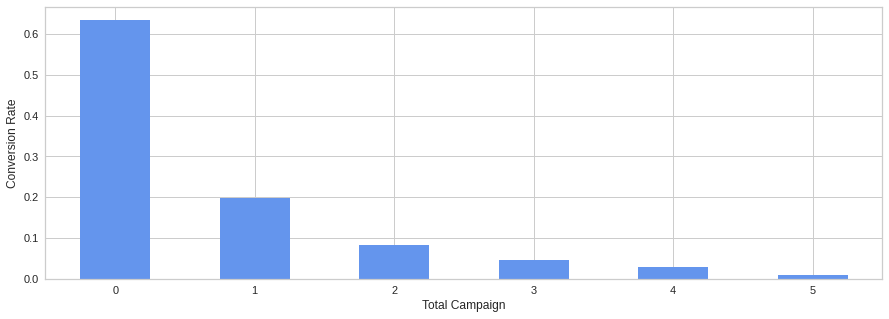

In [47]:
plt.figure(figsize=(15,5))
df_campaign.loc[campaign_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Total Campaign', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

***Observasi***

Customer yang belum pernah diberikan campaign memiliki conversion rate paling besar yaitu 63%

### Marital Status vs Conversion Rate

In [48]:
df_marital = df1.groupby('Marital_Status')['conversion_rate'].sum()/(df1['conversion_rate'].sum())
df_marital = df_marital.sort_values(ascending=False)
df_marital

Marital_Status
Menikah        0.375109
Bertunangan    0.256839
Lajang         0.228448
Cerai          0.099760
Janda          0.039244
Duda           0.000600
Name: conversion_rate, dtype: float64

In [49]:
marital_order = ['Lajang', 'Bertunangan', 'Menikah', 'Cerai', 'Janda', 'Duda']

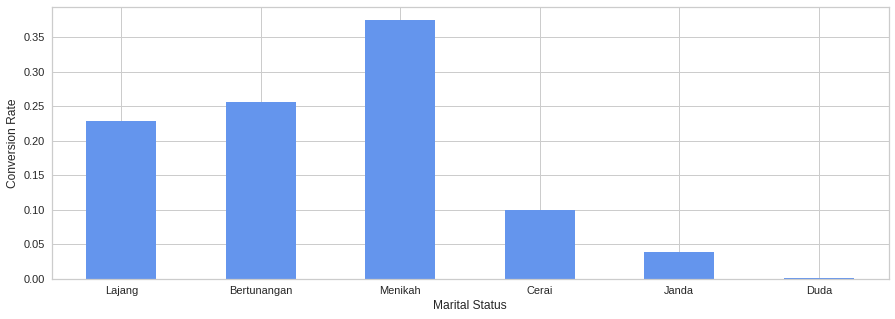

In [50]:
plt.figure(figsize=(15,5))
df_marital.loc[marital_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Marital Status', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observasi**

Customer yang menikah memiliki Conversion Rate lebih tinggi dibanding yang lain yaitu sebesar 37%

### Education vs Conversion Rate

In [51]:
df_education = df1.groupby('Education')['conversion_rate'].sum()/(df1['conversion_rate'].sum())
df_education = df_education.sort_values(ascending=False)
df_education

Education
S1     0.528389
S3     0.217606
S2     0.171284
D3     0.076833
SMA    0.005889
Name: conversion_rate, dtype: float64

In [52]:
education_order = ['SMA', 'D3', 'S1', 'S2', 'S3']

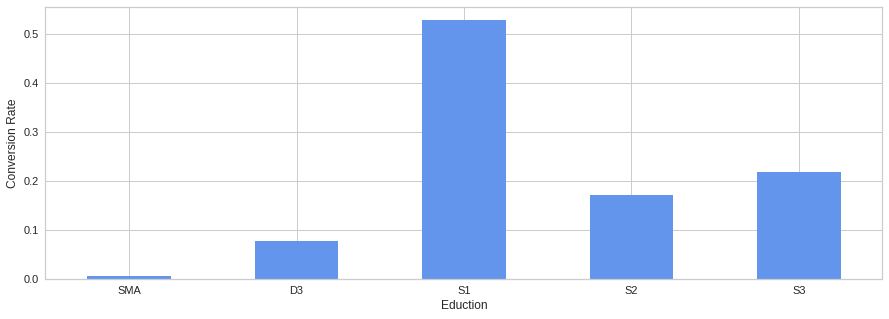

In [53]:
plt.figure(figsize=(15,5))
df_education.loc[education_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Eduction', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observasi**

Customer dengan latar belakang pendidikan S1 memilik Conversion Rate paling tinggi sebesar 53%

### Family Size vs Conversion Rate

In [54]:
df_familysize = df1.groupby('Family_Size')['conversion_rate'].sum()/(df1['conversion_rate'].sum())
df_familysize = df_familysize.sort_values(ascending=False)
df_familysize

Family_Size
2    0.442475
3    0.265399
1    0.220685
4    0.064695
5    0.006747
Name: conversion_rate, dtype: float64

In [55]:
familysize_order = [1, 2, 3, 4, 5]

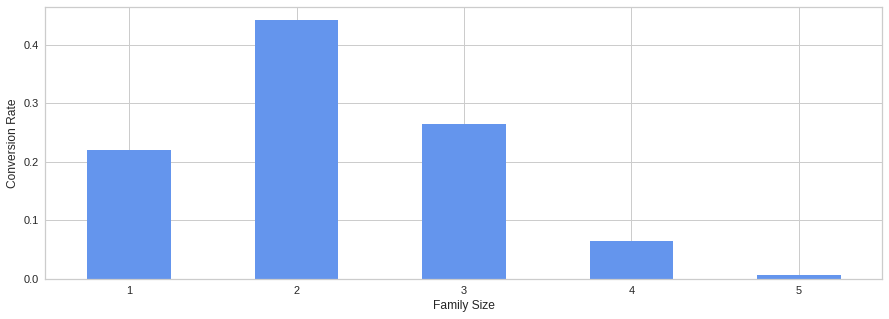

In [56]:
plt.figure(figsize=(15,5))
df_familysize.loc[familysize_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Family Size', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

***Observasi***

Customer dengan keluarga beranggotakan 2 orang memiliki conversion rate paling tinggi yaitu 44%

###Since Registration vs Conversion Rate

In [57]:
df_registration = df1.groupby('since_registration')['conversion_rate'].sum()/(df1['conversion_rate'].sum())
df_registration = df_registration.sort_values(ascending=False)
df_registration

since_registration
9     0.536418
8     0.285706
10    0.177876
Name: conversion_rate, dtype: float64

In [58]:
regist_order = [8, 9, 10]

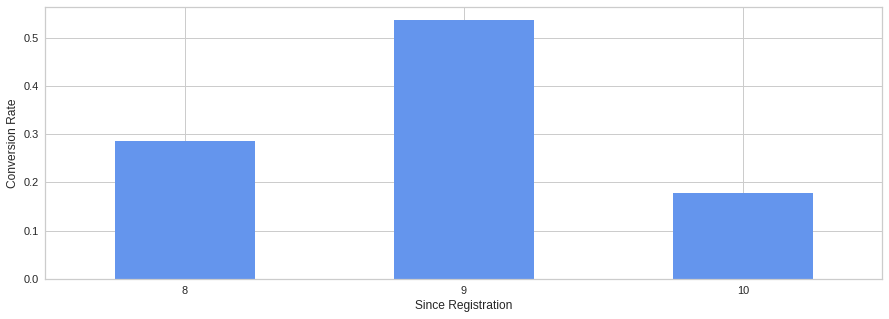

In [59]:
plt.figure(figsize=(15,5))
df_registration.loc[regist_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Since Registration', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

***Observasi***

Customer yang sudah berlangganan selama 9 tahun memiliki conversion rate paling tinggi sebesar 54%

### Income Group vs Conversion Rate

In [60]:
df_income = df1.groupby('income_group')['conversion_rate'].sum()/(df1['conversion_rate'].sum())
df_income = df_income.sort_values(ascending=False)
df_income

income_group
Above 75.000.000           0.388752
65.000.001 - 75.000.000    0.241056
55.000.001 - 65.000.000    0.144144
45.000.001 - 55.000.000    0.098426
35.000.001 - 45.000.000    0.058647
25.000.001 - 35.000.000    0.036316
under 25.000.000           0.032659
Name: conversion_rate, dtype: float64

In [61]:
income_order = ['under 25.000.000', '25.000.001 - 35.000.000', '35.000.001 - 45.000.000', '45.000.001 - 55.000.000', '55.000.001 - 65.000.000', '65.000.001 - 75.000.000', 'Above 75.000.000']

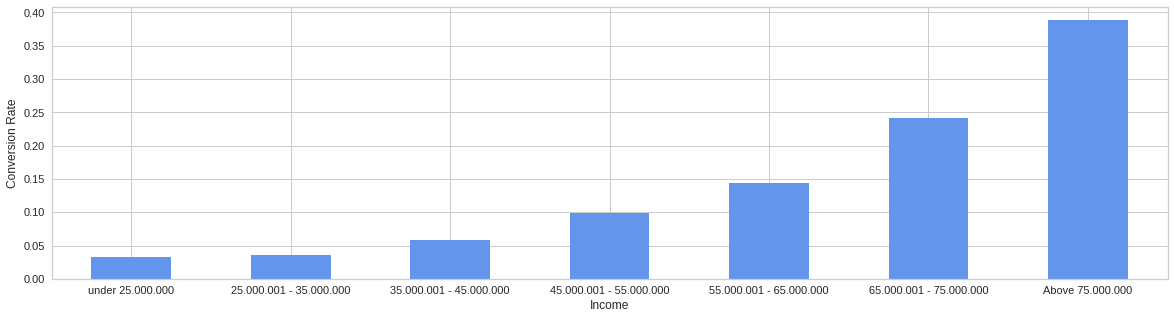

In [62]:
plt.figure(figsize=(20,5))
df_income.loc[income_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Income', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observasi**

Customer dengan pendapatan lebih dari 75.000.000 memiliki Conversion Rate paling tinggi yaitu 39%

### Total Spent Group vs Conversion Rate

In [63]:
df_spent = df1.groupby('spent_group')['conversion_rate'].sum()/(df1['conversion_rate'].sum())
df_spent = df_spent.sort_values(ascending=False)
df_spent

spent_group
1.000.001 - 1.500.000    0.306958
500.001 - 1.000.000      0.246397
Above 1.500.000          0.225463
100.001 - 500.000        0.142090
50.001 - 100.000         0.041635
under 50.000             0.037456
Name: conversion_rate, dtype: float64

In [64]:
spent_order = ['under 50.000', '50.001 - 100.000', '100.001 - 500.000', '500.001 - 1.000.000', '1.000.001 - 1.500.000', 'Above 1.500.000']

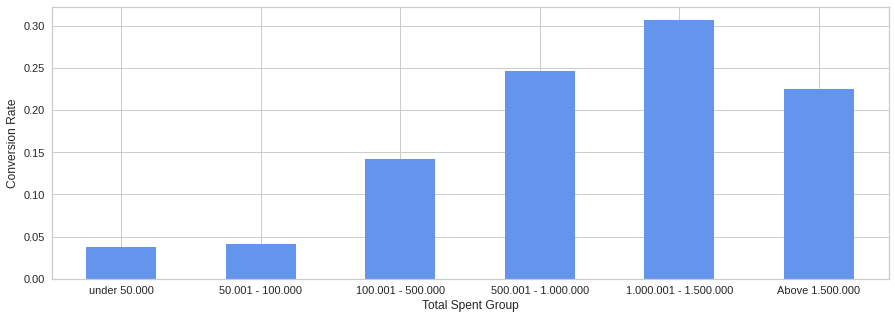

In [65]:
plt.figure(figsize=(15,5))
df_spent.loc[spent_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Total Spent Group', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observasi**

Customer dengan total pembelian 1.000.001 - 1.500.000 memiliki Conversion Rate paling tinggi sebesar 31%

### Age Group vs Conversion Rate

In [66]:
df_age = df1.groupby('age_group')['conversion_rate'].sum()/(df1['conversion_rate'].sum())
df_age = df_age.sort_values(ascending=False)
df_age

age_group
45 - 54 years old     0.278016
55 - 64 years old     0.226355
65 - 74 years old     0.208455
35 - 44 years old     0.173549
25 - 34 years old     0.066317
Above 74 years old    0.047308
Name: conversion_rate, dtype: float64

In [67]:
age_order = ['25 - 34 years old', '35 - 44 years old', '45 - 54 years old', '55 - 64 years old', '65 - 74 years old', 'Above 74 years old']

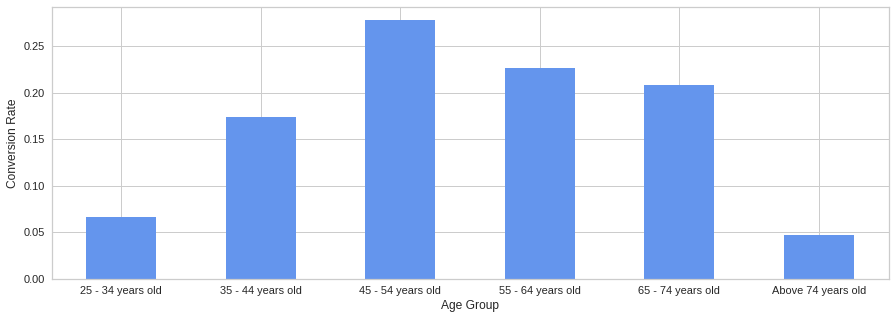

In [68]:
plt.figure(figsize=(15,5))
df_age.loc[age_order].plot(kind = 'bar', color='cornflowerblue')
plt.xticks(rotation=0, fontsize=11)
plt.yticks(rotation=0, fontsize=11)
plt.xlabel('Age Group', fontsize=12)
plt.ylabel('Conversion Rate', fontsize=12)
plt.show()

**Observasi**

Customer dengan umur 45 - 54 tahun memiliki Conversion Rate paling tinggi sebesar 28%

## 5. Interpretasi plot tersebut dan perhatikan, Apakah terdapat hubungan yang signifikan customer dengan conversion rate

**Kesimpulan**

* Customer dengan umur 45 - 54 tahun memiliki Conversion Rate paling tinggi sebesar 28%

* Customer dengan total pembelian 1.000.001 - 1.500.000 memiliki Conversion Rate paling tinggi sebesar 31%

* Customer dengan pendapatan lebih dari 75.000.000 memiliki Conversion Rate paling tinggi yaitu 39%

* Customer yang sudah berlangganan selama 9 tahun memiliki conversion rate paling tinggi sebesar 54%

* Customer dengan keluarga beranggotakan 2 orang memiliki conversion rate paling tinggi yaitu 44%

* Customer dengan latar belakang pendidikan S1 memilik Conversion Rate paling tinggi sebesar 53%

* Customer yang menikah memiliki Conversion Rate lebih tinggi dibanding yang lain yaitu sebesar 37%

* Customer yang belum pernah diberikan campaign memiliki conversion rate paling besar yaitu 63%

**Business Recomendation :**
tim Marketing bisa membuat iklan campaign berikutnya dengan menargetkan customer yang memiliki karakteristik tertentu sesuai dengan kesimpulan diatas. Karena 63% dari customer dengan conversion rate yang tinggi adalah customer yang belum pernah diberikan campaign sebelumnya, ada baiknya untuk memperluas wilayah jangkauan pemasaran produk.

# Part 2
1. Membuang data yang tidak diperlukan
2. Melakukan feature encoding
3. Melakukan standardisasi pada feature

In [137]:
df2 = df1.copy()

## 1.Membuang data yang tidak diperlukan

In [138]:
#hapus kolom yang tidak digunakan
df2.drop(['Z_CostContact', 'Z_Revenue', 'Year_Birth', 'Dt_Customer', 'Kidhome', 'Teenhome', 'Relationship', 'ID'], axis=1, inplace=True)
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 33 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Education            2240 non-null   object 
 1   Marital_Status       2240 non-null   object 
 2   Income               2240 non-null   float64
 3   Recency              2240 non-null   int64  
 4   MntCoke              2240 non-null   int64  
 5   MntFruits            2240 non-null   int64  
 6   MntMeatProducts      2240 non-null   int64  
 7   MntFishProducts      2240 non-null   int64  
 8   MntSweetProducts     2240 non-null   int64  
 9   MntGoldProds         2240 non-null   int64  
 10  NumDealsPurchases    2240 non-null   int64  
 11  NumWebPurchases      2240 non-null   int64  
 12  NumCatalogPurchases  2240 non-null   int64  
 13  NumStorePurchases    2240 non-null   int64  
 14  NumWebVisitsMonth    2240 non-null   int64  
 15  AcceptedCmp3         2240 non-null   i

In [139]:
#remove outlier kolom Age
df2.drop(df2[(df2['Age']>100)].index,inplace=True)

In [140]:
#remove outlier kolom lainnya
numeric_columns_to_filter = ['Income', 'MntCoke', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumWebVisitsMonth']
Q1 = df2[numeric_columns_to_filter].quantile(0.0)
Q3 = df2[numeric_columns_to_filter].quantile(0.90)
IQR = Q3 - Q1
print('Here we will get IQR for each column\n',IQR)

df2= df2[~((df2[numeric_columns_to_filter] < (Q1 - 1.5 * IQR)) |(df2[numeric_columns_to_filter] > (Q3 + 1.5 * IQR))).any(axis=1)]
display(df1.shape)
display(df2.shape)

Here we will get IQR for each column
 Income                 78046600.0
MntCoke                  822400.0
MntFruits                 82400.0
MntMeatProducts          498400.0
MntFishProducts          120000.0
MntSweetProducts          89000.0
MntGoldProds             122000.0
NumDealsPurchases             5.0
NumWebPurchases               8.0
NumCatalogPurchases           7.0
NumWebVisitsMonth             8.0
dtype: float64


(2240, 41)

(2220, 33)

##2. Melakukan feature encoding

In [141]:
df3 = df2.copy()

In [142]:
cat = df3.select_dtypes(include='object')
catcol = cat.columns
num = df3.select_dtypes(include=['int64', 'float64'])
numcol = num.columns

In [143]:
for col in catcol:
    print(f'Value counts kolom \033[1m{col}\033[0m:\n{df3[col].value_counts()}\n')

Value counts kolom Education:
S1     1120
S3      480
S2      368
D3      198
SMA      54
Name: Education, dtype: int64

Value counts kolom Marital_Status:
Menikah        858
Bertunangan    573
Lajang         479
Cerai          230
Janda           77
Duda             3
Name: Marital_Status, dtype: int64

Value counts kolom age_group:
45 - 54 years old     726
55 - 64 years old     485
35 - 44 years old     429
65 - 74 years old     406
25 - 34 years old     119
Above 74 years old     55
Name: age_group, dtype: int64

Value counts kolom income_group:
Above 75.000.000           353
35.000.001 - 45.000.000    350
45.000.001 - 55.000.000    339
55.000.001 - 65.000.000    319
65.000.001 - 75.000.000    316
25.000.001 - 35.000.000    307
under 25.000.000           236
Name: income_group, dtype: int64

Value counts kolom spent_group:
100.001 - 500.000        528
under 50.000             401
500.001 - 1.000.000      389
1.000.001 - 1.500.000    354
50.001 - 100.000         308
Above 1.500.000 

In [144]:
#Encoding kolom Education
df3.Education = df3.Education.map({
    'SMA':0,
    'D3':1,
    'S1':2,
    'S2':3,
    'S3':4,
})

In [145]:
#Encoding kolom Marital_Status
df3.Marital_Status = df3.Marital_Status.map({
'Menikah':2,
'Bertunangan':1,
'Lajang':0,
'Cerai':3,
'Janda':4,
'Duda':5
})

In [146]:
#Encoding kolom age_group
df3.age_group = df3.age_group.map({
'45 - 54 years old':2,
'55 - 64 years old':3,
'35 - 44 years old':1,
'65 - 74 years old':4,
'25 - 34 years old':0,
'Above 74 years old':5
})

In [147]:
#Encoding kolom income_group
df3.income_group = df3.income_group.map({
'Above 75.000.000':6,
'35.000.001 - 45.000.000':2,
'45.000.001 - 55.000.000':3,
'55.000.001 - 65.000.000':4,
'65.000.001 - 75.000.000':5,
'25.000.001 - 35.000.000':1,
'under 25.000.000':0
})

In [148]:
#Encoding kolom spent_group
df3.spent_group = df3.spent_group.map({
'100.001 - 500.000':2,
'under 50.000':0,
'500.001 - 1.000.000':3,
'1.000.001 - 1.500.000':4,
'50.001 - 100.000':1,
'Above 1.500.000':5
})

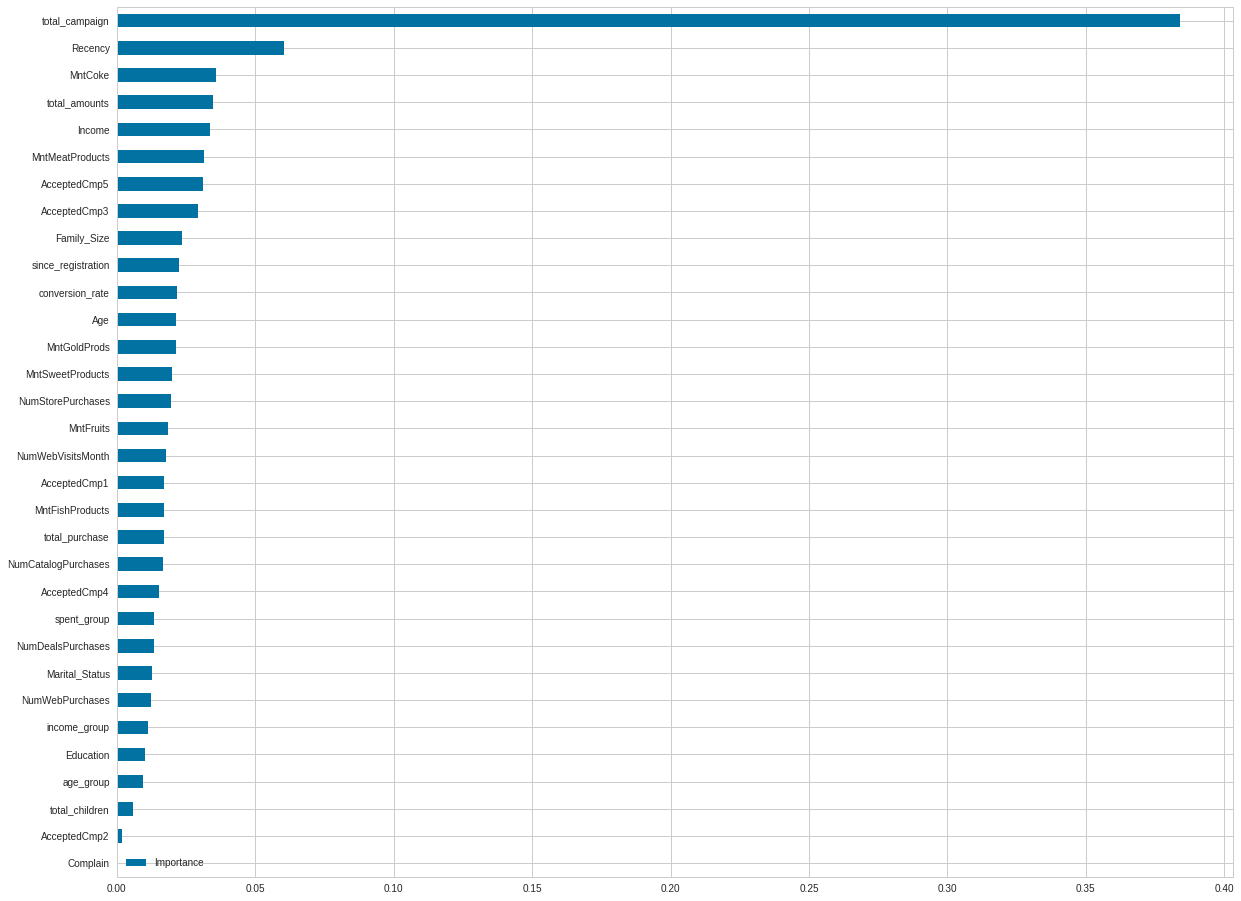

In [149]:
#Feature Importance
rfc = RandomForestClassifier()
rfc.fit(df3.drop('Response', axis=1), df3['Response'])

plt.style.use('seaborn-whitegrid')
importance = rfc.feature_importances_
importance = pd.DataFrame(importance, index=df3.drop('Response', axis=1).columns, columns=["Importance"])
importance.sort_values(by='Importance', ascending=True).plot(kind='barh', figsize=(20,len(importance)/2));

## 3. Melakukan standardisasi pada feature

In [150]:
#scaling
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2','Complain', 'Response', 'since_registration']
df3 = df3.drop(cols_del, axis=1)
scaler = StandardScaler()
scaler.fit(df3)
df4 = pd.DataFrame(scaler.transform(df3),columns= df3.columns)

Dalam masalah ini, ada banyak faktor yang menjadi dasar pengelompokkan akhir yang akan dilakukan. Faktor-faktor ini pada dasarnya adalah kolom atau fitur, semakin banyak fitur, semakin sulit untuk diproses. Banyak dari fitur ini berkorelasi, dan menjadi beban proses. Inilah mengapa akan mengurangi dimensi pada fitur yang dipilih sebelum menempatkannya melalui pengelompokkan. Analisis komponen utama (PCA) adalah teknik untuk mengurangi dimensi dataset dengan meningkatkan interpretabilitas tetapi pada saat yang sama meminimalkan kehilangan informasi.

In [151]:
#mengurangi dimensi jadi 3 menggunakan PCA
pca = PCA(n_components=3)
pca.fit(df4)
df_pca = pd.DataFrame(pca.transform(df4), columns=(["A","B", "C"]))
df_pca.describe().T

,count,mean,std,min,25%,50%,75%,max
A,2220.0,8.961800e-17,3.247115,-5.567123,-3.043698,-0.762839,2.819803,8.182056
B,2220.0,1.600321e-17,1.651094,-4.184831,-1.215710,-0.117873,1.192109,6.339418
C,2220.0,-4.160836e-17,1.364939,-4.262587,-0.928251,-0.075105,0.911201,5.112659


In [152]:
print('Result table after perfoming encoding, scaling and PCA methods')
df_pca.head()

Result table after perfoming encoding, scaling and PCA methods


,A,B,C
0,4.855347,0.070147,-0.274185
1,-3.067612,0.594666,2.021729
2,2.320112,-0.109346,0.299714
3,-3.243946,-1.426720,-0.888203
4,-0.070816,0.537267,-1.286843


In [153]:
x = df_pca["A"]
y = df_pca["B"]
z = df_pca["C"]

fig = go.Figure(data=[go.Scatter3d(
    x=x,y=y,z=z,mode='markers',
    marker=dict(size=6,color=x,opacity=0.8))])

# tight layout
fig.update_layout( title={'text': "3D scatterplot of size-reduced data",'y':0.9,
        'x':0.5,'xanchor': 'center','yanchor': 'top'},
                  margin=dict(l=200, r=220, b=0, t=0))
fig.show()

# Part 3
1. Melihat jumlah cluster yang tepat dengan menggunakan elbow method
2. Melakukan implementasi clustering dengan menggunakan k-means clustering
3. Menghitung sillhouette score melihat bagaimana performa model yang didapat

### 1. Melihat jumlah cluster yang tepat dengan menggunakan elbow method

Menggunakan "elbow" atau "knee of a curve" sebagai titik potong adalah heuristik umum dalam pengoptimalan matematis untuk memilih titik di mana hasil yang menurun tidak lagi sepadan dengan biaya tambahan. Dalam pengelompokan cluster, ini berarti seseorang harus memilih beberapa kelompok dengan tepat.

KElbowVisualizer mengimplementasikan metode “elbow” untuk membantu memilih jumlah cluster yang optimal dengan menyesuaikan model dengan kisaran nilai K.
Jika bagan garis menyerupai lengan, maka "elbow" (titik belok pada kurva) merupakan indikasi yang baik bahwa model yang mendasari paling cocok pada titik tersebut.

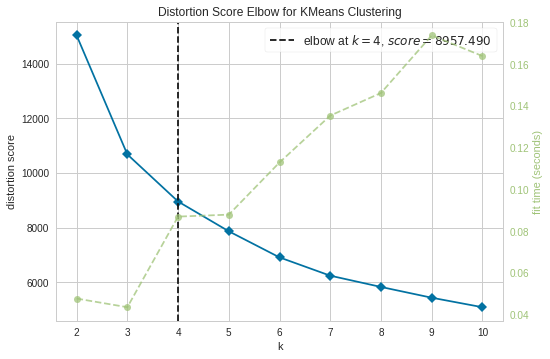

In [155]:
#membuat cluster dengan Elbow Method
plt_elb = KElbowVisualizer(KMeans(), k=10)
plt_elb.fit(df_pca)
plt_elb.show()

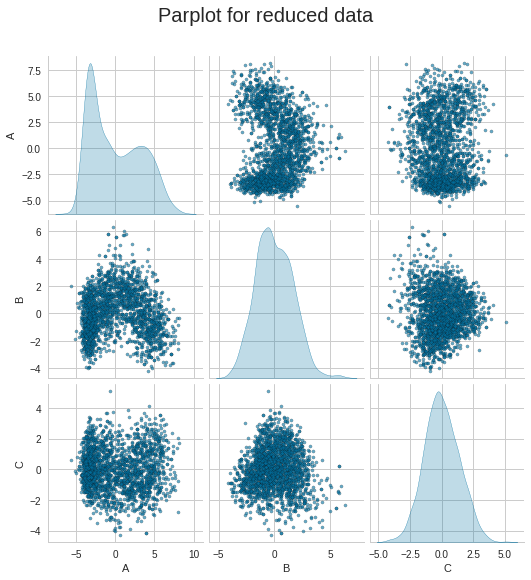

In [156]:
#lihat cluster lebih jelas dengan plot
g = sns.pairplot(df_pca, diag_kind="kde",
                 plot_kws = {'alpha': 0.6, 's': 10, 'edgecolor': 'k'})
g.fig.suptitle('Parplot for reduced data', 
             size = 20, y=1.07);

### 2. Melakukan implementasi clustering dengan menggunakan k-means clustering

In [157]:
#pengelompokkan menggunakan KMeans clustering
kmeans = KMeans(n_clusters=4).fit(df_pca)
# fit model and predict clusters
fp_kmeans = kmeans.fit_predict(df_pca)
df_pca['cluster'] = fp_kmeans
#menambahkan Clusters feature
df3['cluster'] = fp_kmeans

In [158]:
df_pca['cluster'].value_counts().to_frame().reset_index()

,index,cluster
0,3,597
1,0,544
2,2,544
3,1,535


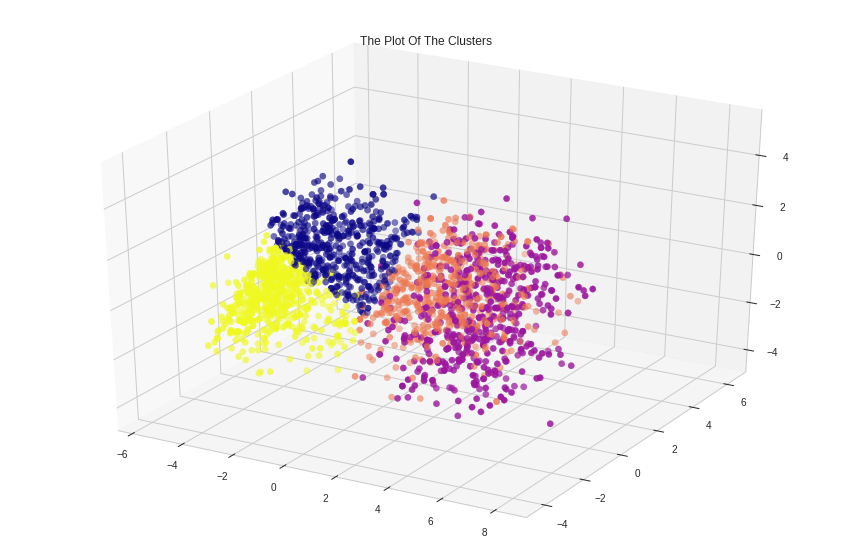

In [159]:
#Plotting the clusters
fig = plt.figure(figsize=(15,10))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=df_pca['cluster'], marker='o', cmap='plasma')
ax.set_title("The Plot Of The Clusters")
plt.show()

### 3. Menghitung sillhouette score melihat bagaimana performa model yang didapat

In [165]:
# Silhouette Analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    
    # Initialise kmeans
    kmeans = KMeans()
    kmeans.fit(df_pca)
    cluster_labels = kmeans.labels_
    
    # Silhouette Score
    silhouette_avg = silhouette_score(df_pca, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.345099757043
For n_clusters=3, the silhouette score is 0.34458341416744936
For n_clusters=4, the silhouette score is 0.3479356231728581
For n_clusters=5, the silhouette score is 0.34766186331013915
For n_clusters=6, the silhouette score is 0.3444645910901933
For n_clusters=7, the silhouette score is 0.34616690811651285
For n_clusters=8, the silhouette score is 0.34620443194681744


**n_cluster = 4 memiliki nilai silhouette paling tinggi.**

Nilai dari Sillhouette ada diantara -1 sampai dengan 1. Jika nilainya mendekati angka 1, maka titik data akan sangat mirip dengan titik data lainnya di cluster yang sama. Jika mendekati -1 maka titik data tersebut tidak mirip dengan titik data di klusternya.

# Part 4
1. Melakukan interpretasi terhadap hasil cluster yang ada dari masing-masing feature yang digunakan
2. Memilih cluster yang akan dilakukan marketing retargetting
3. Menghitung potential impact dari hasil marketing retargetting dari cluster yang ada

###1. Melakukan interpretasi terhadap hasil cluster yang ada dari masing-masing feature yang digunakan

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).

/usr/local/lib/python3.8/dist-packages/seaborn/axisgrid.py:409: RuntimeWarning:

More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning

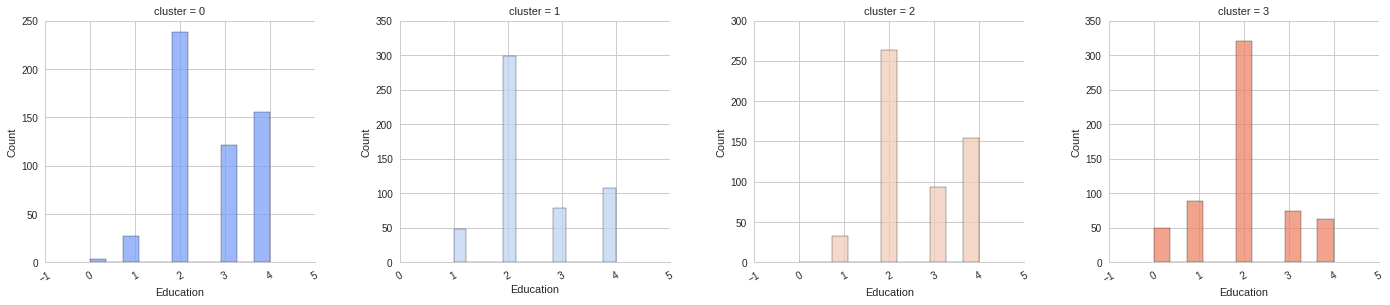

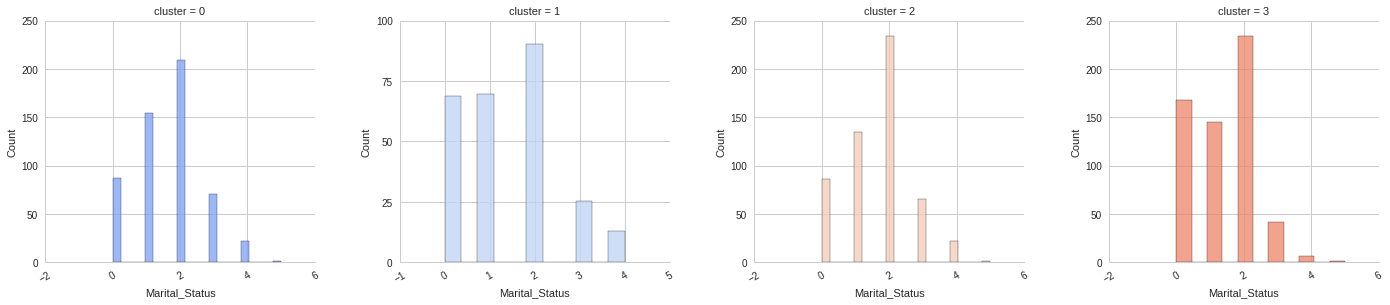

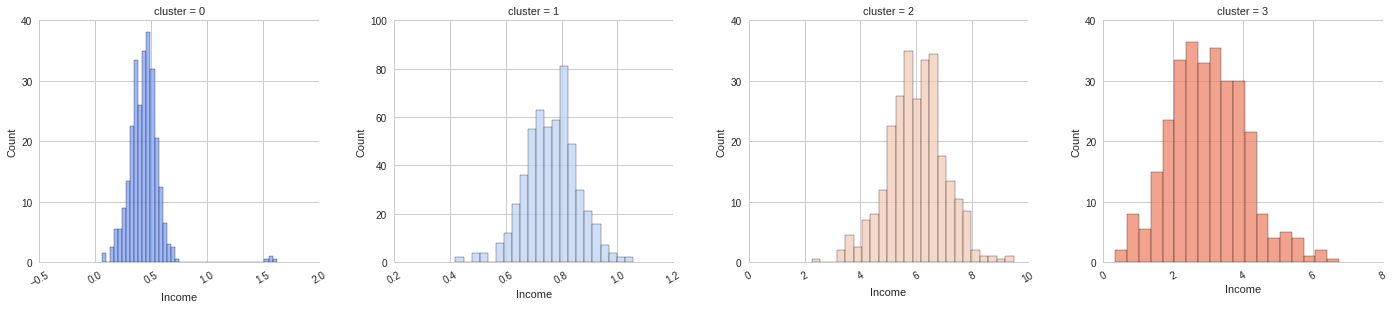

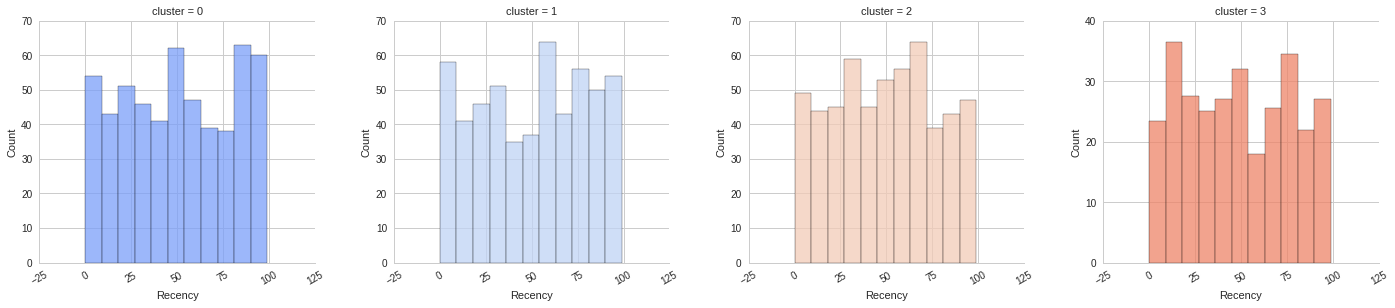

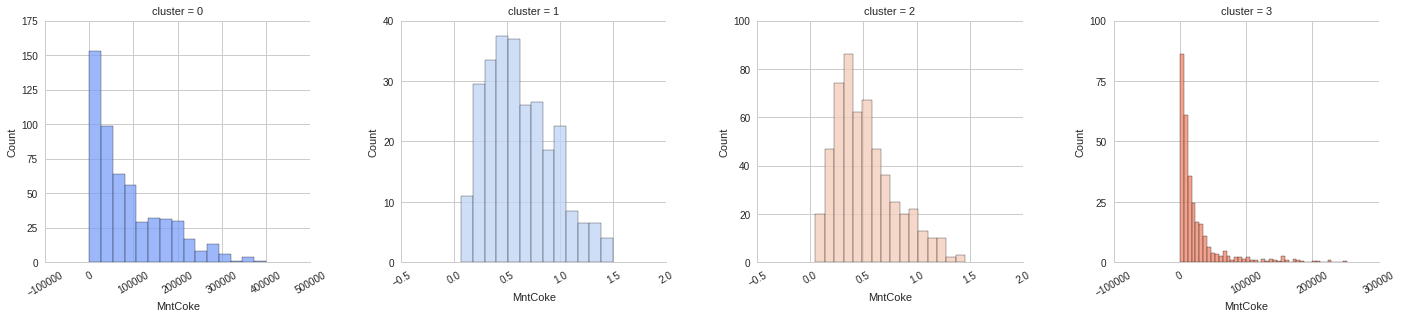

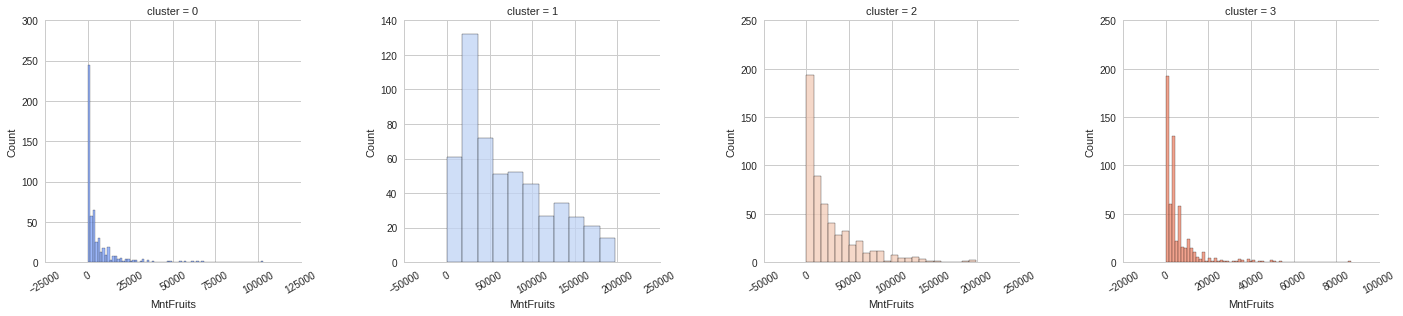

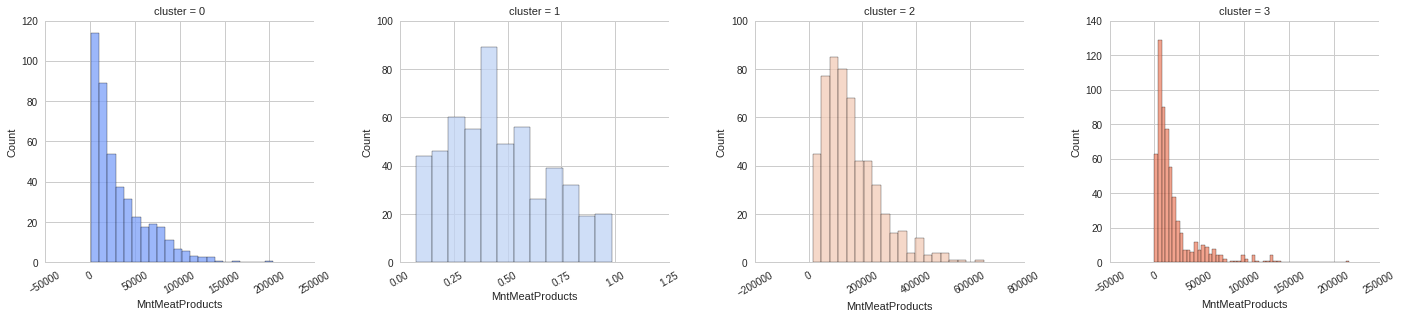

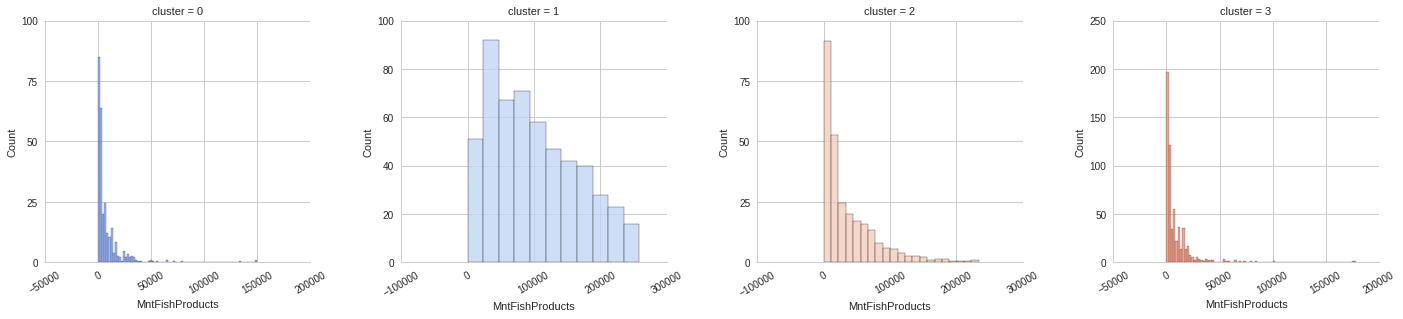

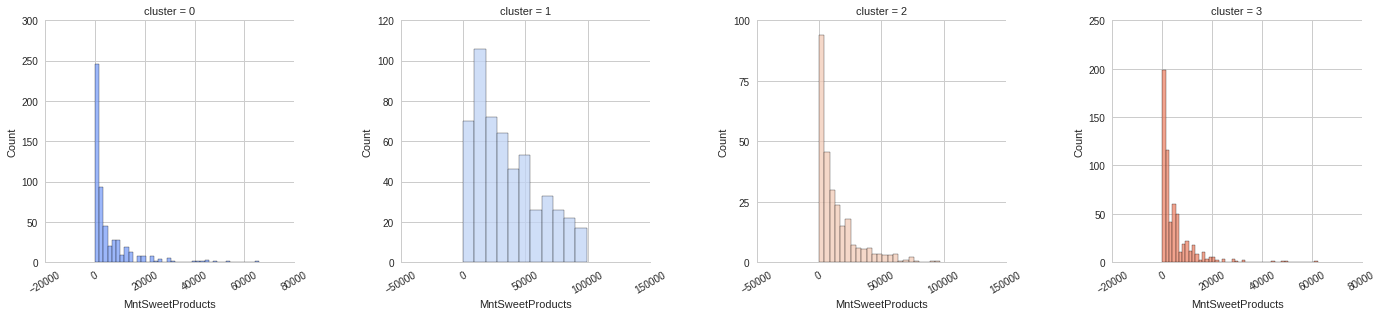

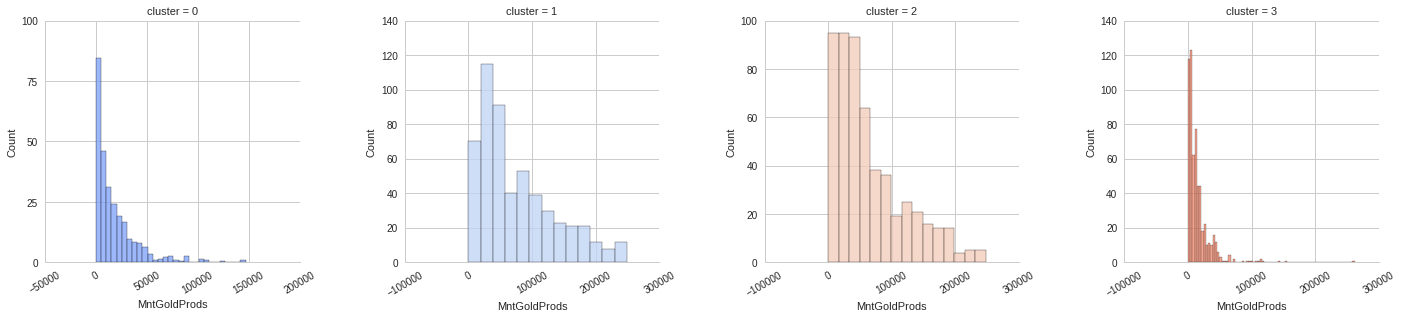

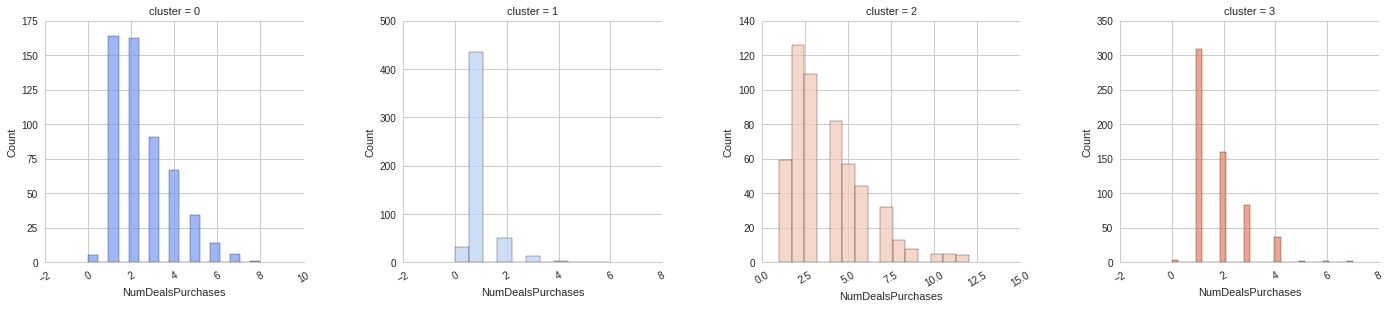

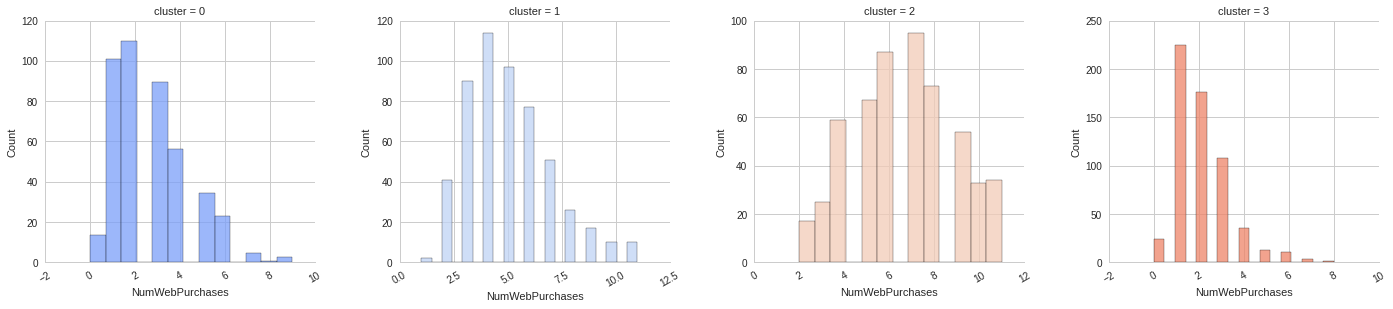

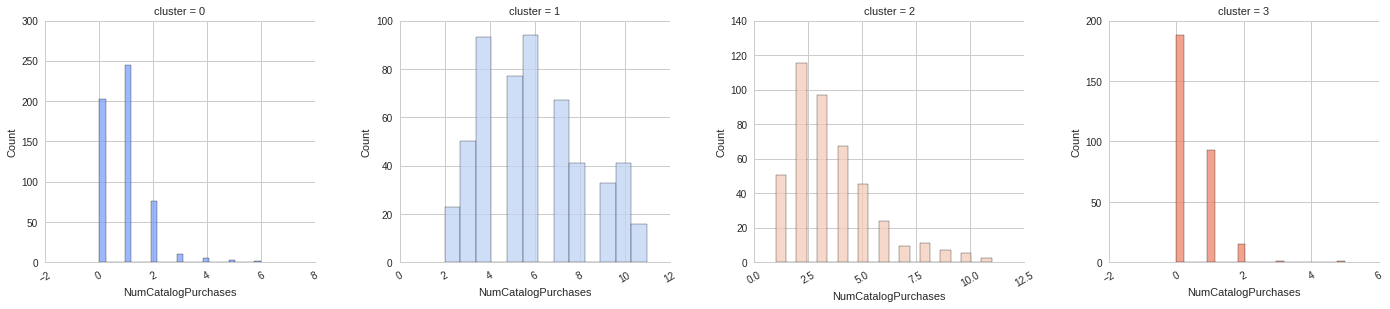

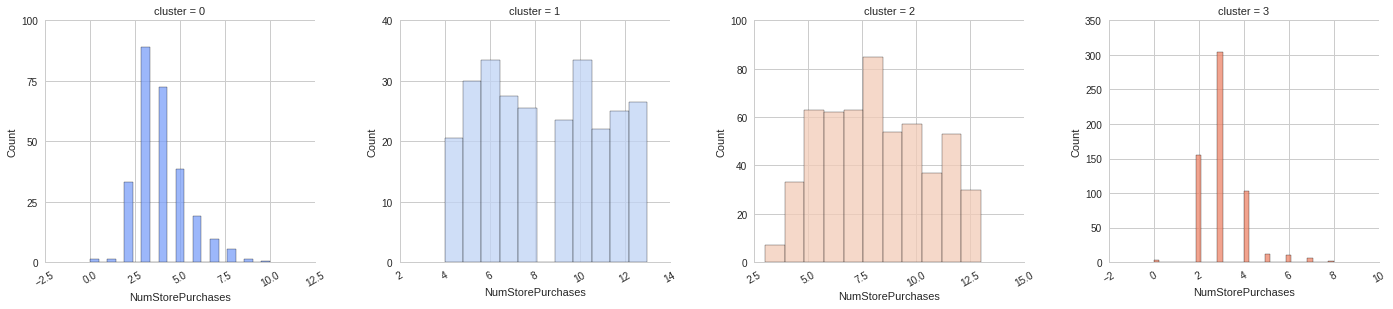

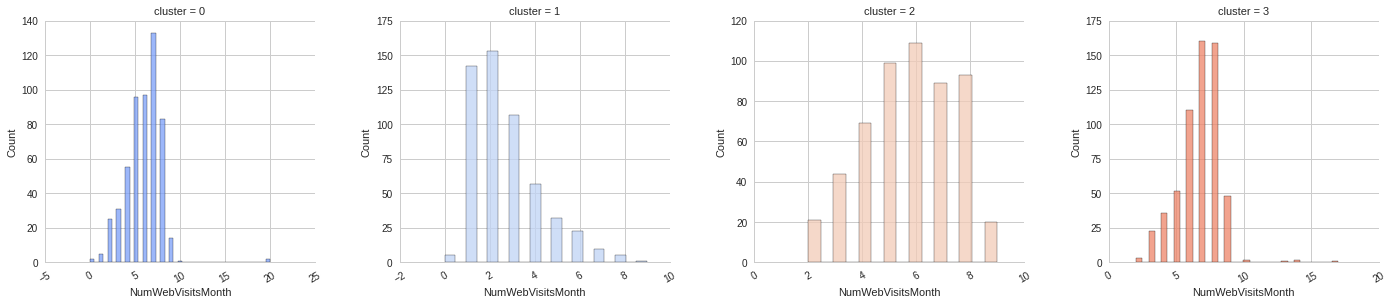

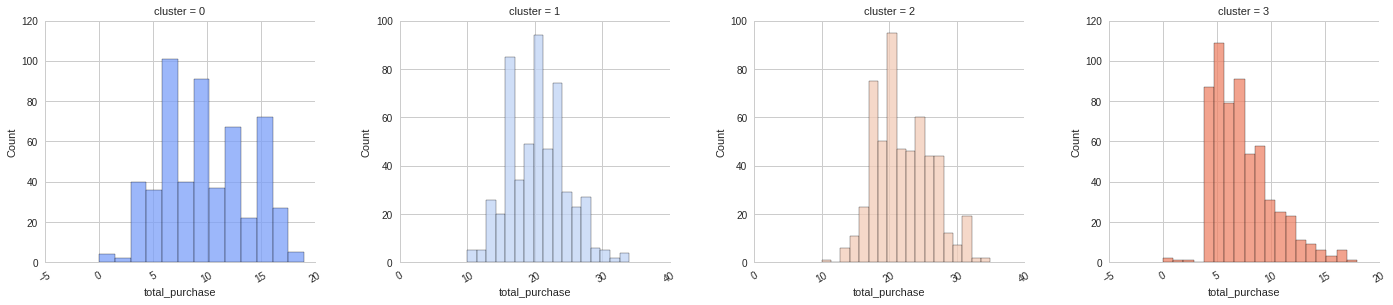

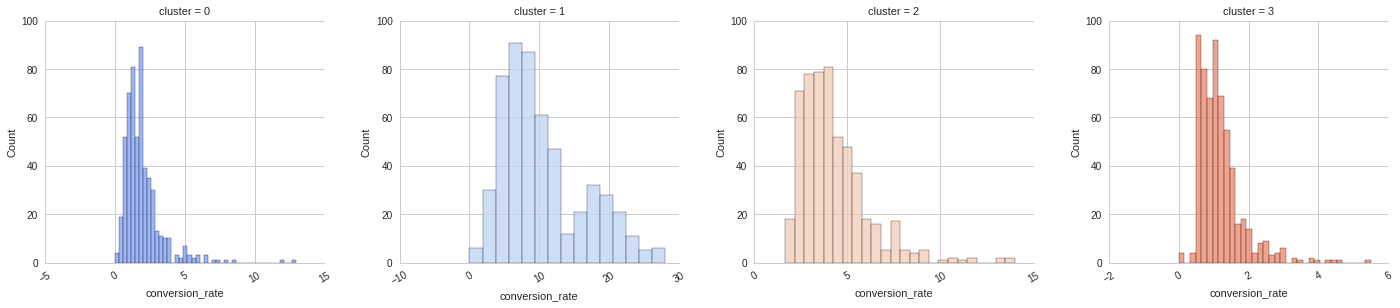

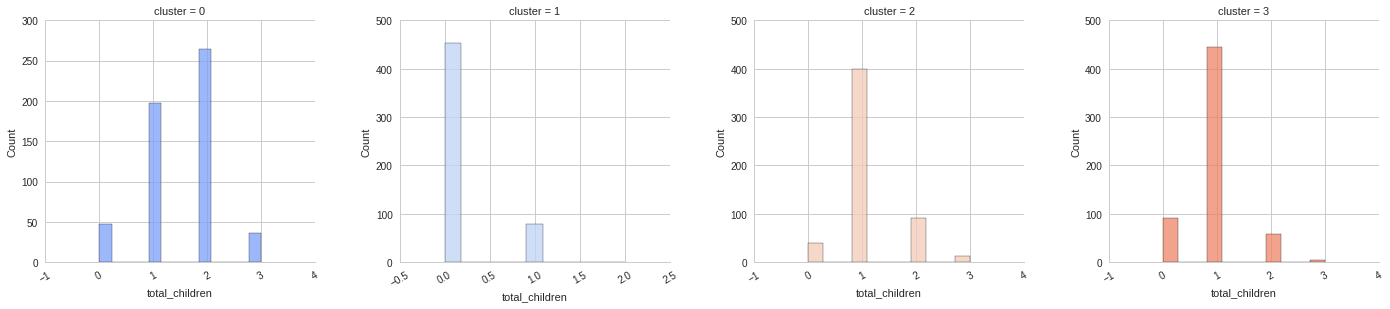

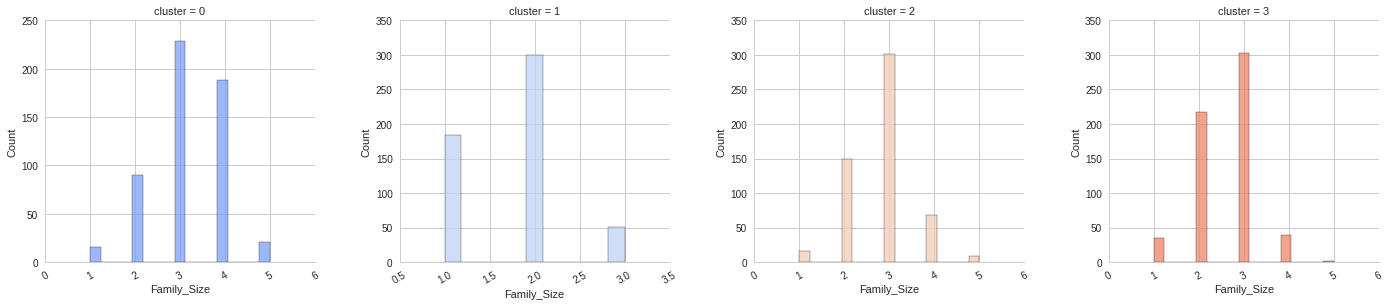

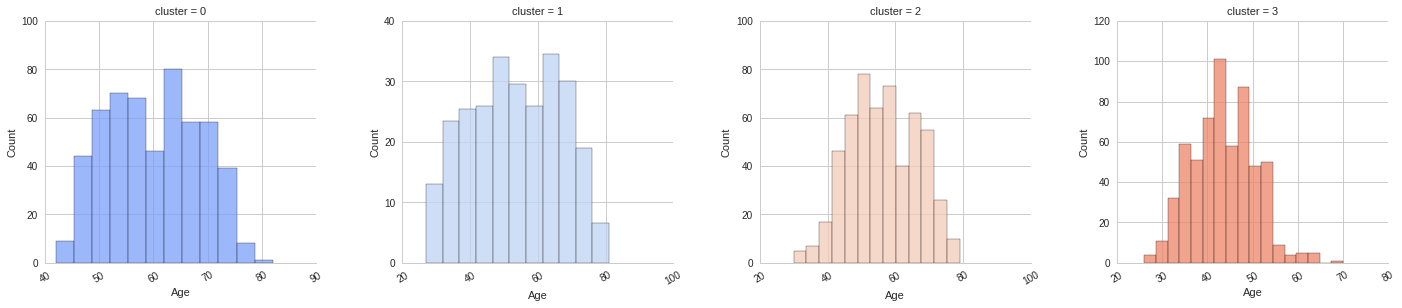

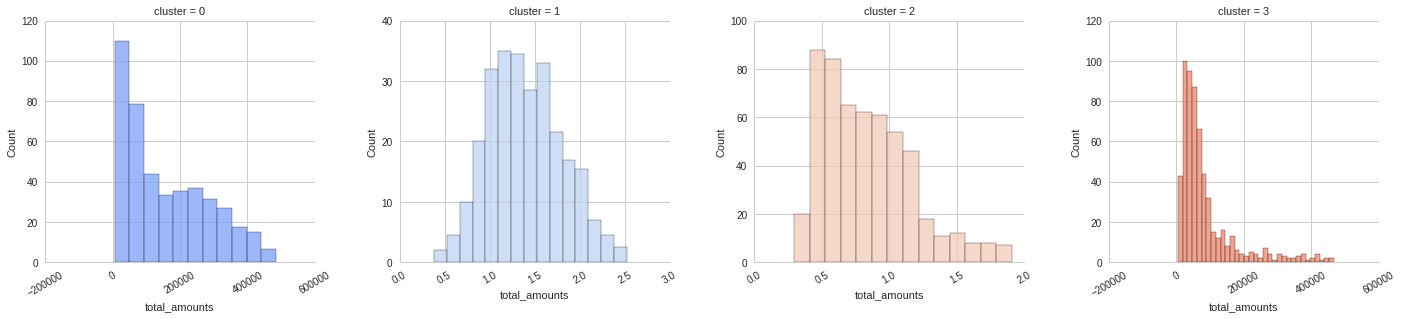

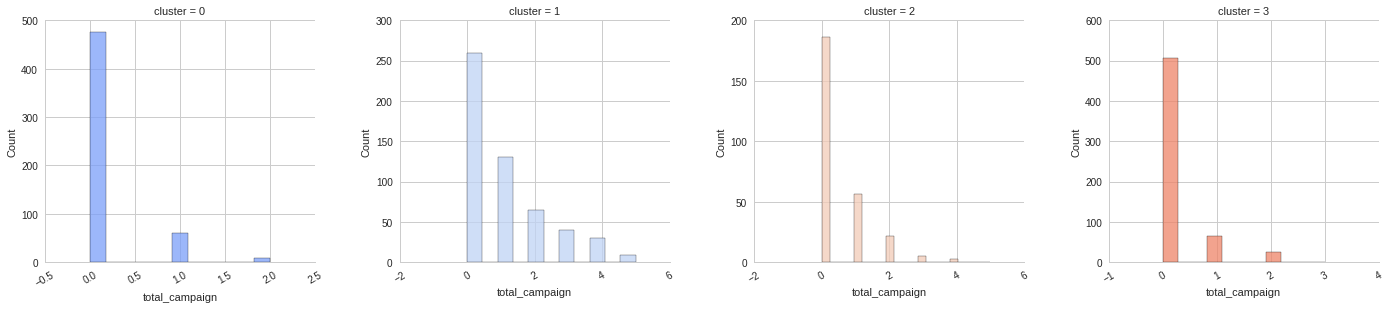

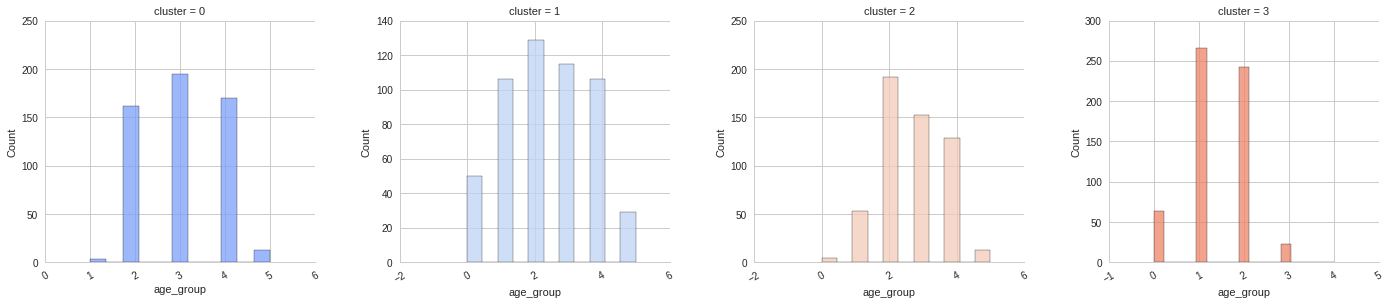

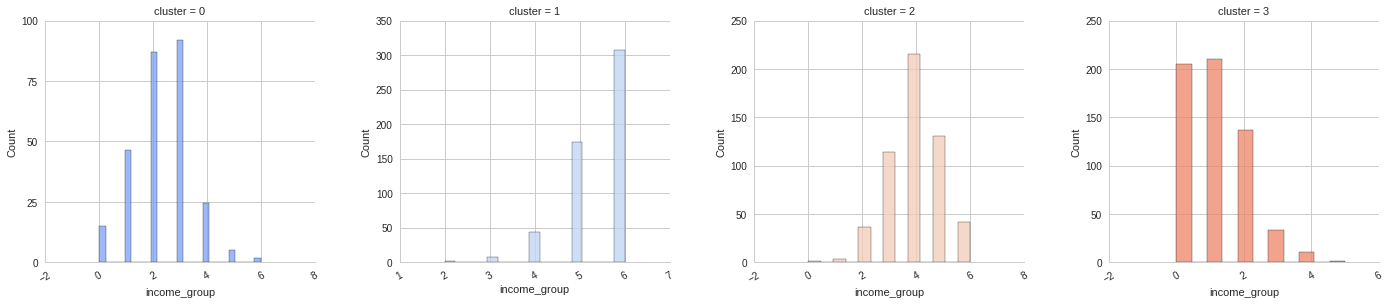

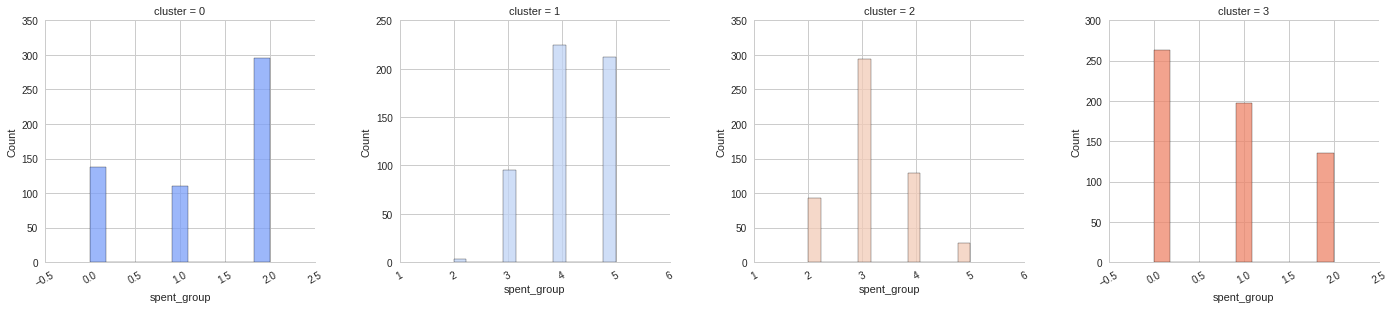

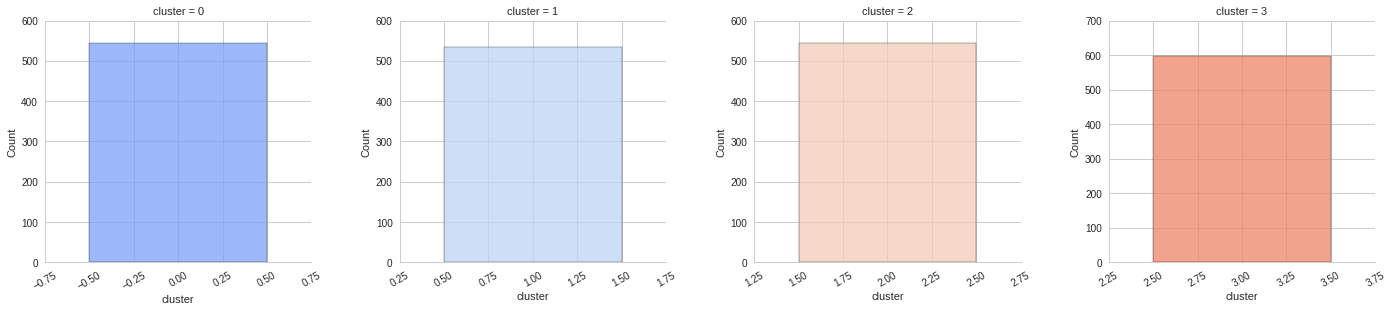

In [169]:
for i in df3:
    g = sns.FacetGrid(df3, col = 'cluster', hue = 'cluster', palette = "coolwarm", sharey=False, sharex=False)
    g.map(sns.histplot,i) 
    
    g.set_xticklabels(rotation=30)
    g.set_yticklabels()
    g.fig.set_figheight(5)
    g.fig.set_figwidth(20)

Karakteristik Cluster 0

* Total amount yang dihabiskan untuk berbelanja sebesar 100.001 - 500.000
* Customer memiliki penghasilan sebesar 35.000.000 - 55.000.000
* Customer berusia 55 - 64 tahun
* Customer Sudah Menikah, punya 2 anak dan memiliki latar belakang pendidikan S1.
* Customer membeli produk gold	dengan amount dibawah 25.000, 
produk	sweet dibawah 10.000, 
produk ikan	dibawah 25.000,
produk daging	dibawah 25.000,
produk soda	dibawah 50.000,
produk buah	dibawah 12.500.
* Customer visit web sebulan 7 kali dan membeli langsung di toko sebanyak 3 kali.


Karakteristik Cluster 1
* Total amount yang dihabiskan untuk berbelanja sebesar 1.000.001 - 1.500.000
* Customer memiliki penghasilan sebesar diatas 75.000.000
* Customer berusia 45 - 64 tahun
* Customer Sudah Menikah, belum memiliki anak dan memiliki latar belakang pendidikan S1
* Customer membeli 
produk gold	dengan amount dibawah 50000, 
produk	sweet dibawah 50.000, 
produk ikan	dibawah 100.000,
produk daging	dibawah 50.000,
produk soda	dibawah 60.000,
produk buah	dibawah 50.000
* Customer visit web sebulan 2 kali dan membeli langsung di toko sebanyak 6-10 kali

Karakteristik Cluster 2
* Total amount yang dihabiskan untuk berbelanja sebesar 500.001 - 1.000.000
* Customer memiliki penghasilan sebesar 55.000.001 - 65.000.000
* Customer berusia 45 - 54 tahun
* Customer Sudah Menikah, punya 1 anak dan memiliki latar belakang pendidikan S1 
* Customer membeli 
produk gold	dengan amount dibawah 50000, 
produk	sweet dibawah 10.000, 
produk ikan	dibawah 50.000,
produk daging	dibawah 200.000,
produk soda	dibawah 50.000,
produk buah	dibawah 25.000
* Customer visit web sebulan 6 kali dan membeli langsung di toko sebanyak 8 kali


Karakteristik Cluster 3
* Total amount yang dihabiskan untuk berbelanja dibawah 50.000
* Customer memiliki penghasilan sebesar dibawah 25.000.000 - 35.000.000
* Customer berusia 25 - 44 tahun
* Customer Sudah Menikah, punya 1 anak dan memiliki latar belakang pendidikan S1 
* Customer membeli 
produk gold	dengan amount dibawah 50.000, 
produk	sweet dibawah 10.000, 
produk ikan	dibawah 25.000,
produk daging	dibawah 25.000,
produk soda	dibawah 50.000,
produk buah	dibawah 10.000
* Customer visit web sebulan 8 kali dan membeli langsung di toko sebanyak 3 kali

### 2. Memilih cluster yang akan dilakukan marketing retargetting

Marketing ditargetkan menjadi 2 tempat yaitu pada Web dan Toko.

Target marketing pembelanjaan pada web karakteristik cluster 0, 2 dan 3.

Target marketing pembelanjaan pada toko karakteristik 1 dan 2.



### 3. Menghitung potential impact dari hasil marketing retargetting dari cluster yang ada

**Perhitungan pembelanjaan lewat WEB**
* **cluster 0**

visit web sebulan x total amount (yang dihabiskan untuk berbelanja) x jumlah cust cluster

= 7 x 1.000.000 sampai 1.500.000 x 544

= **3.808.000.000 sampai 5.712.000.000** (Dengan tingkat conversion rate 100% dimana setiap visit pasti membeli)

* **cluster 2** 

visit web sebulan x total amount (yang dihabiskan untuk berbelanja) x jumlah cust cluster

= 6 x 500.000 sampai 1.000.000 x 544

= **1.632.000.000 sampai 3.264.000.000** (Dengan tingkat conversion rate 100% dimana setiap visit pasti membeli)
* **cluster 3** 

visit web sebulan x total amount (yang dihabiskan untuk berbelanja) x jumlah cust cluster

= 8 x 50.000 x 597

= **238.800.800** (Dengan tingkat conversion rate 100% dimana setiap visit pasti membeli)

**Perhitungan pembelanjaan pada TOKO**
* **cluster 1**

visit toko sebulan x total amount (yang dihabiskan untuk berbelanja) x jumlah cust cluster

= 6 x 1.000.000 sampai 1.500.000 x 544

= **3.264.000.000 sampai 4.896.000.000** (Dengan tingkat conversion rate 100% dimana setiap visit pasti membeli)
* cluster 2

visit toko sebulan x total amount (yang dihabiskan untuk berbelanja) x jumlah cust cluster

= 8 x 500.000 sampai 1.000.000 x 544

= **2.176.000.000 sampai 4.352.000.000** (Dengan tingkat conversion rate 100% dimana setiap visit pasti membeli)
